<a href="https://colab.research.google.com/github/shekhar-banerjee96/atomic_signal_event_predictor/blob/main/atomic_physics_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Import Data

### Use the provided datafile to get the details the attributes mentioned are as follows :  

- EventId: Identifier for each event in the experiment.
- DER_mass_MMC: Derived mass of the Missing Mass Calculator. Represents the calculated mass of a system using the missing energy in the experiment.
- DER_mass_transverse_met_lep: Indicates the mass calculated from the transverse components of missing energy and lepton.
- DER_mass_vis: Derived mass of the visible part of the system. Represents the mass of the visible particles in the system, excluding invisible or undetected particles.
- DER_pt_h: Transverse momentum of the Higgs boson. Indicates the momentum of the Higgs boson in the transverse plane, providing information about its motion.
- DER_deltaeta_jet_jet: The absolute difference in pseudorapidity between the two jets. Describes the angular separation between two jets in the experiment.
- DER_mass_jet_jet: Derived mass of the two jets.
- DER_lep_eta_centrality: Pseudorapidity centrality of the lepton concerning jets.Pseudorapidity is a spatial coordinate used in particle physics. This feature likely indicates the centrality of the lepton (a charged particle, possibly an electron or a muon) concerning jets in the event. The centrality provides information about the lepton's position relative to the jets.
- PRI_tau_pt: Transverse momentum of the tau.Transverse momentum is the momentum of a particle in the direction perpendicular to the beamline. This feature represents the transverse momentum of the tau particle, which is a heavy, charged particle often involved in processes like tau decays.
- PRI_tau_eta: Pseudorapidity of the tau.Pseudorapidity is a measure of the angle of a particle's trajectory relative to the beamline. This feature indicates the pseudorapidity of the tau particle, providing information about its direction.
- PRI_tau_phi: Azimuthal angle of the tau.Azimuthal angle defines the rotation of a particle's trajectory around the beamline. This feature represents the azimuthal angle of the tau particle, indicating its orientation in the transverse plane.
- PRI_lep_pt: Transverse momentum of the lepton.Similar to PRI_tau_pt, this feature represents the transverse momentum of the lepton (electron or muon) in the event.
- PRI_lep_eta: Pseudorapidity of the lepton.Similar to PRI_tau_eta, this feature indicates the pseudorapidity of the lepton, providing information about its angular position relative to the beamline.
- PRI_lep_phi: Azimuthal angle of the lepton.Similar to PRI_tau_phi, this feature represents the azimuthal angle of the lepton, indicating its orientation in the transverse plane.
- PRI_met: Missing transverse energy.Missing transverse energy is a crucial concept in particle physics. It represents the imbalance in transverse energy in an event, suggesting the presence of undetected particles or neutrinos.
- PRI_met_phi: Azimuthal angle of the missing transverse energy.Similar to PRI_tau_phi and PRI_lep_phi, this feature represents the azimuthal angle of the missing transverse energy, indicating its orientation in the transverse plane.
- PRI_met_sumet: Sum of the transverse energy of all objects in the event.This feature represents the sum of the transverse energy (energy component perpendicular to the beamline) of all objects (particles) detected in the event. It provides a measure of the overall energy flow in the transverse plane.
- PRI_jet_num: Number of jets in the event.Indicates the count of jets observed in the event. Jets are collimated sprays of particles resulting from high-energy interactions. Knowing the number of jets is crucial for understanding the event's characteristics.
- PRI_jet_leading_pt: Transverse momentum of the leading jet.Represents the transverse momentum of the jet with the highest transverse momentum in the event. The leading jet is the one with the most significant momentum contribution.
- PRI_jet_leading_eta: Pseudorapidity of the leading jet.Indicates the pseudorapidity (angular position) of the leading jet, providing information about its direction in the detector.
- PRI_jet_leading_phi: Azimuthal angle of the leading jet.Represents the azimuthal angle of the leading jet, indicating its orientation in the transverse plane.
- PRI_jet_subleading_pt: Transverse momentum of the subleading jet.Represents the transverse momentum of the second-highest transverse momentum jet in the event (subleading jet).
- PRI_jet_subleading_eta: Pseudorapidity of the subleading jet.Indicates the pseudorapidity of the subleading jet, providing information about its angular position in the detector.
- PRI_jet_subleading_phi: Azimuthal angle of the subleading jet.Represents the azimuthal angle of the subleading jet, indicating its orientation in the transverse plane.
- PRI_jet_all_pt: Sum of the transverse momentum of all jets in the event.This feature represents the sum of the transverse momentum of all jets detected in the event. It provides a measure of the overall transverse momentum contributed by all jets.
- Weight: A weight associated with each event.The weight is a numerical value assigned to each event. It is often used as a scaling factor to account for the significance or importance of each event in the analysis. The weight may be applied during training and evaluation to adjust the contribution of each event to the model.
- Target column(Label): The target variable, indicating the class or label of each event (s or b). This is the target variable where each event is labeled as either signal (s) or background (b)

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Data.csv')

### The shape of the data is :

In [9]:
data.shape

(250000, 33)

### The columns of the data :

In [10]:
data.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [8]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


### Checking the number of unqiue number of values per column :

In [11]:
data.nunique()

EventId                        250000
DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltaeta_jet_jet             7088
DER_mass_jet_jet                68366
DER_prodeta_jet_jet             16593
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
DER_lep_eta_centrality           1002
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_num                         4
PRI_jet_leading_pt              86590
PRI_jet_leading_eta              8558
PRI_jet_lead

## No duplicates found

In [12]:
data.duplicated().sum()

0

## No null values found in rows

In [13]:
data.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

### Checking Datatype of columns for any categorical or string type data.

In [14]:
data.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

## Let's check the distribution of the categorical column , which is alsa the target column.

In [15]:
data['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

Dataset is imbalanced 1:2.  

We need tol make sure that the model , does not get heavoly trained for only one class. 

To fix this - 

- we can oversample the minority class.  
- or use stratified columns.

# Preprocessing

## Label Encoding the Target Column

In [16]:
data['Label'] = data['Label'].astype('category').cat.codes

In [17]:
data['Label'].value_counts()

0    164333
1     85667
Name: Label, dtype: int64

<Axes: xlabel='count', ylabel='Label'>

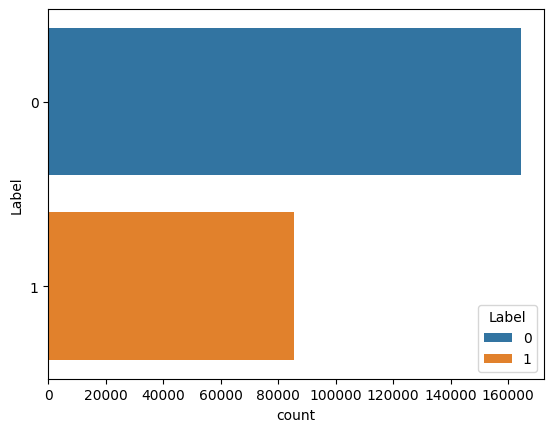

In [19]:
sns.countplot(data = data , y = 'Label', hue = 'Label')

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EventId,250000.0,224999.500000,72168.927986,100000.000000,162499.750000,224999.500000,287499.250000,349999.000000
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000000,78.100750,105.012000,130.606250,1192.026000
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000000,19.241000,46.524000,73.598000,690.075000
DER_mass_vis,250000.0,81.181982,40.828691,6.329000,59.388750,73.752000,92.259000,1349.351000
DER_pt_h,250000.0,57.895962,63.655682,0.000000,14.068750,38.467500,79.169000,2834.999000
DER_deltaeta_jet_jet,250000.0,-708.416643,454.482458,-999.000000,-999.000000,-999.000000,0.490000,9.000000
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000000,-999.000000,-999.000000,83.446000,4974.979000
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000000,-999.000000,-999.000000,-4.593000,16.690000
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208000,1.810000,2.491500,2.961000,5.684000
DER_pt_tot,250000.0,18.917332,22.273494,0.000000,2.841000,12.315500,27.591000,2834.999000


## Checking the distribution of Input and Target Variables

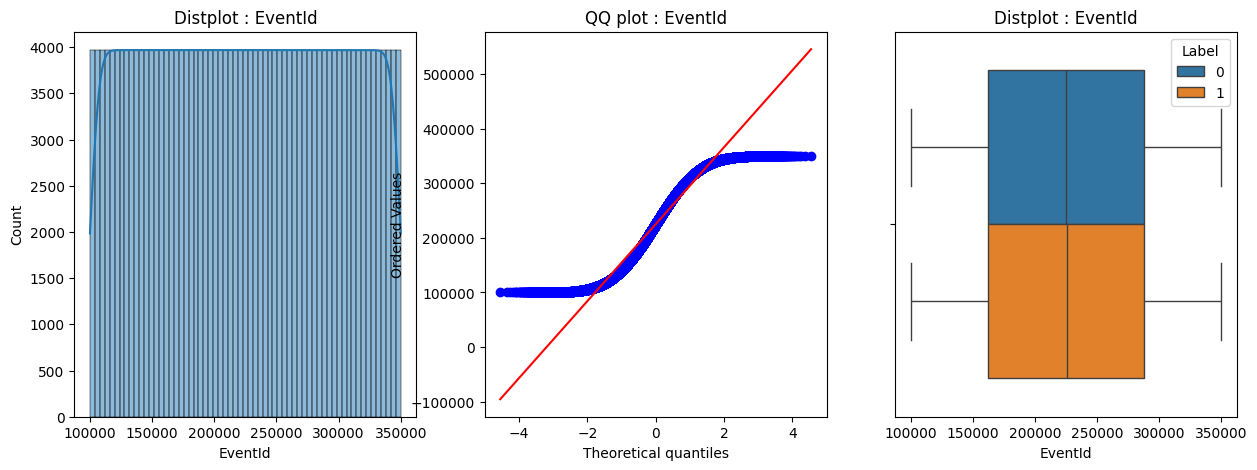

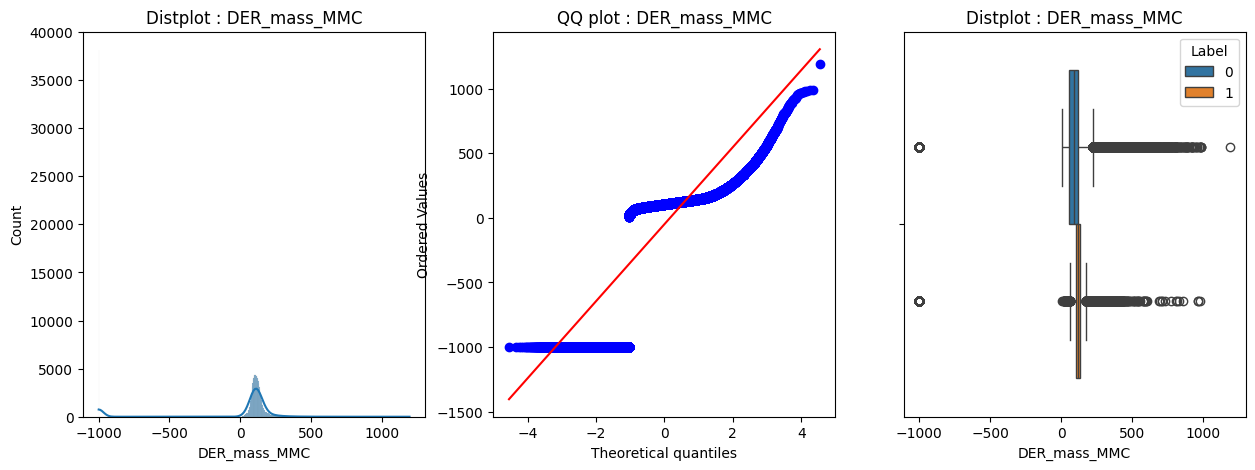

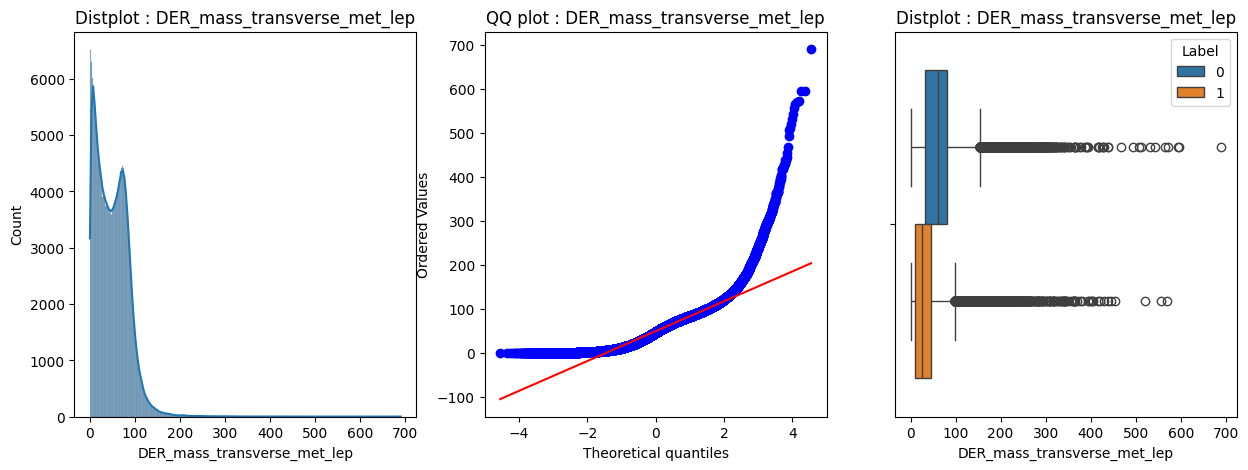

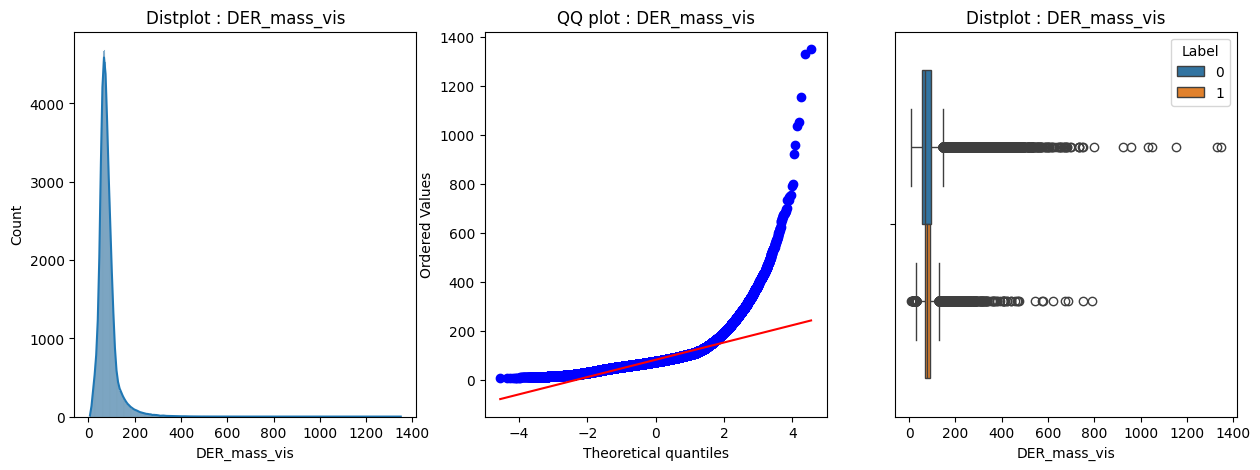

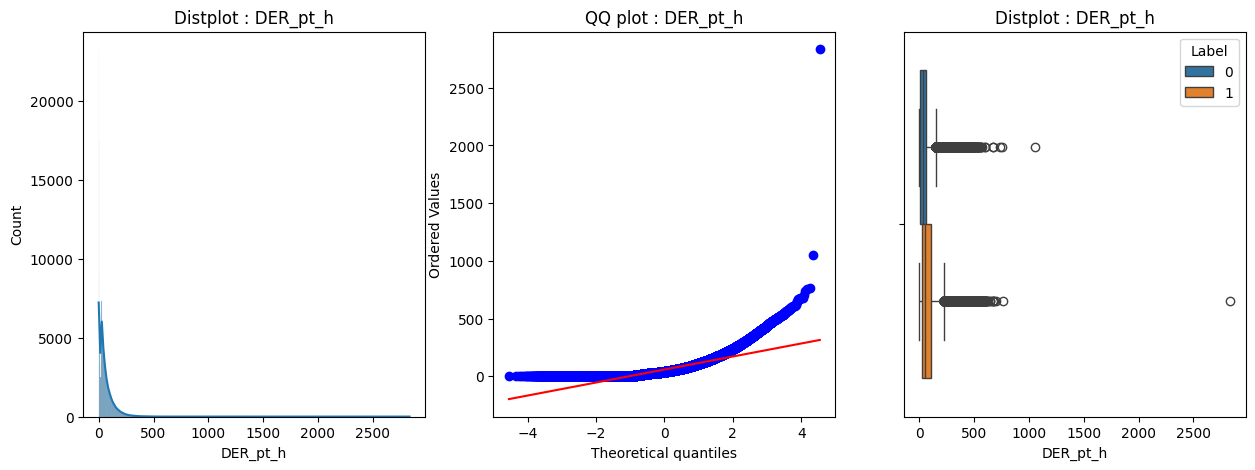

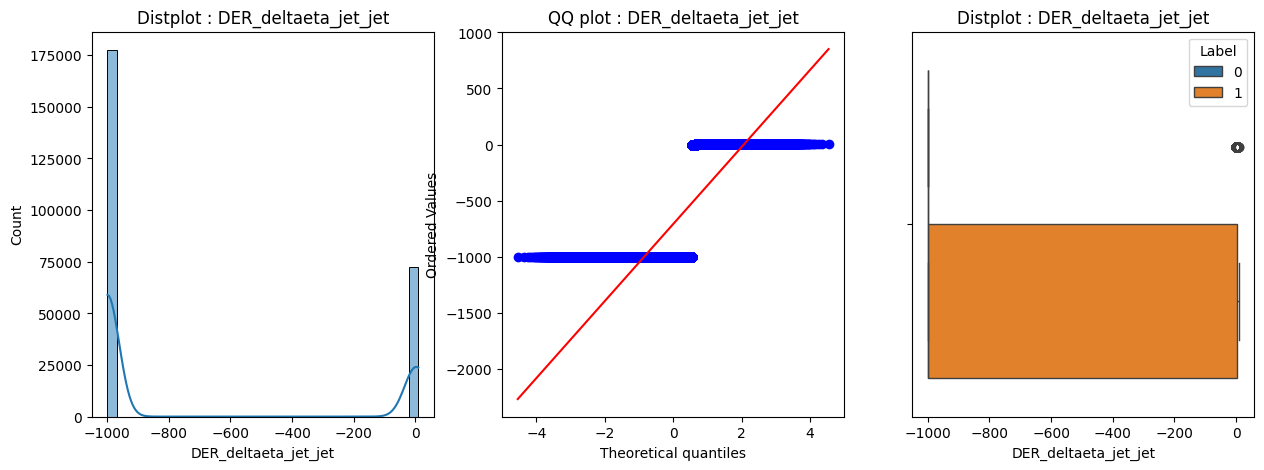

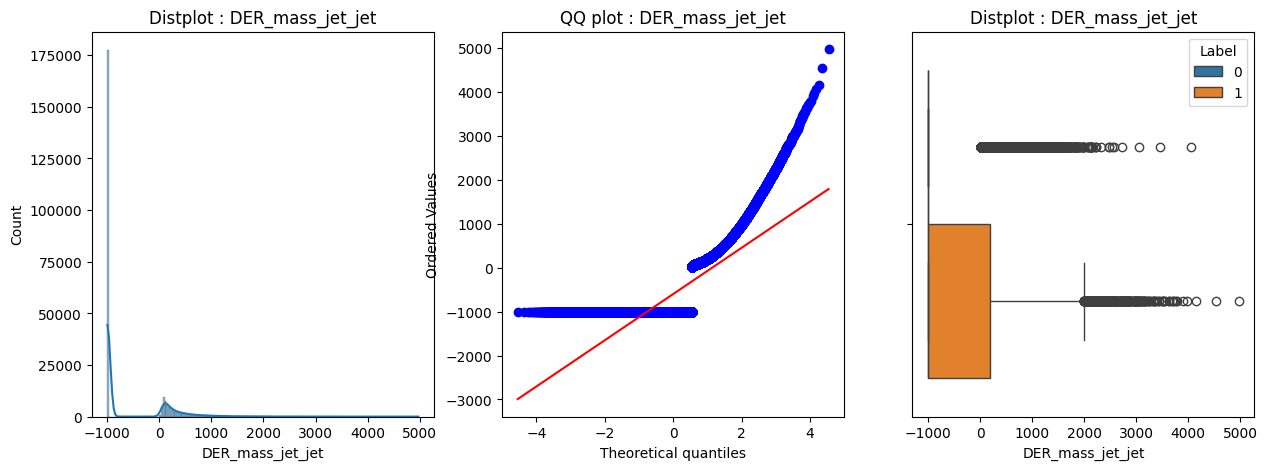

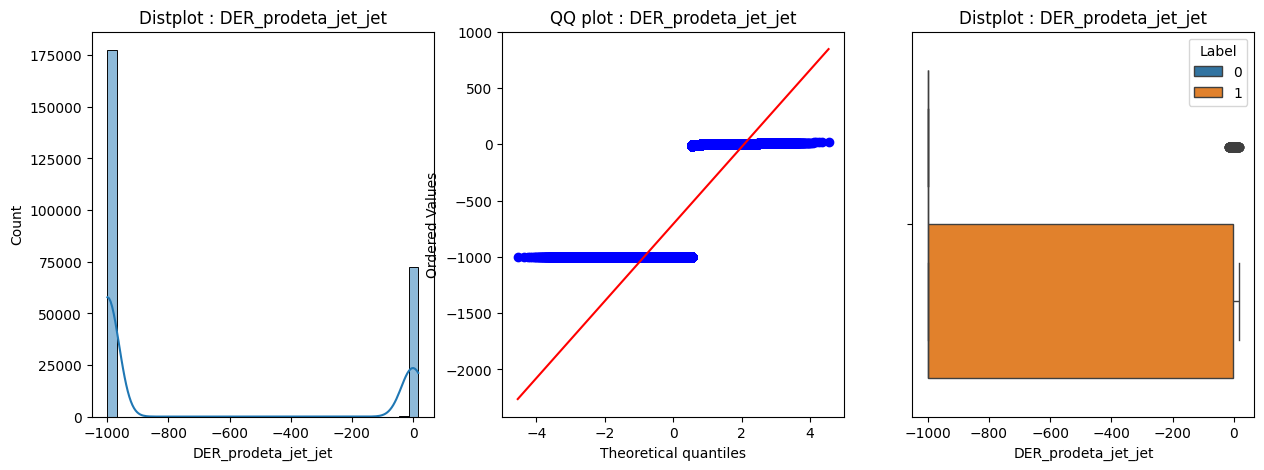

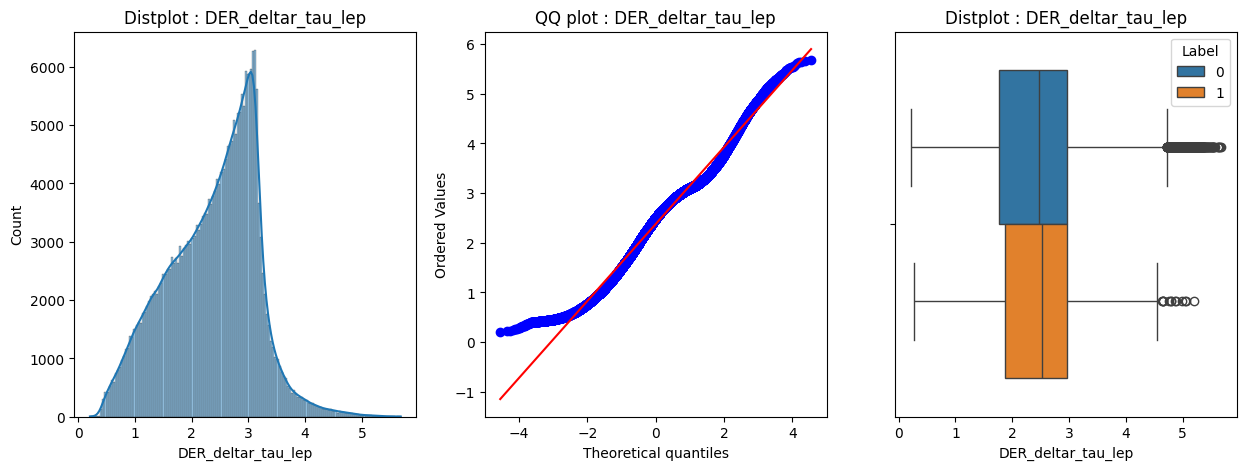

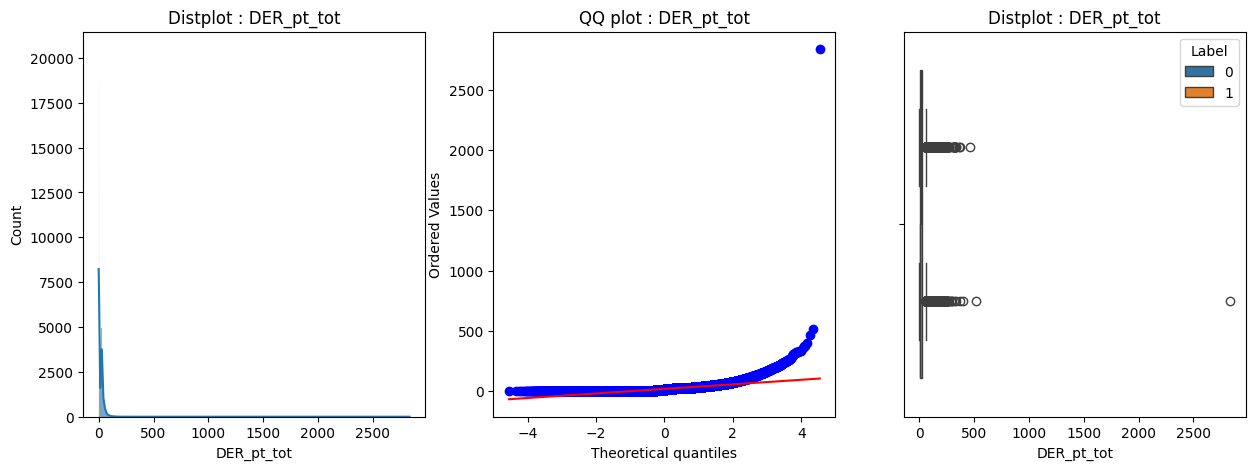

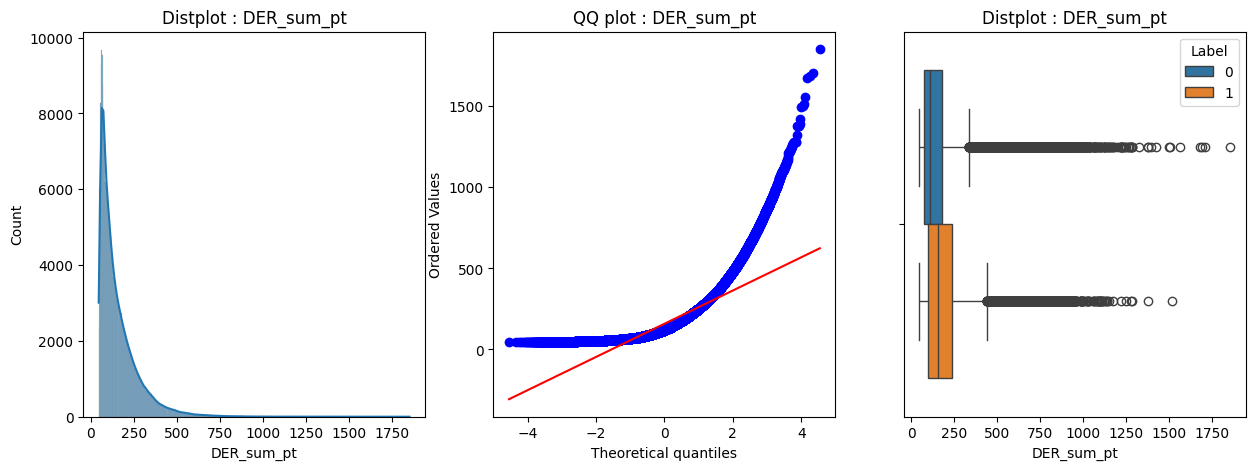

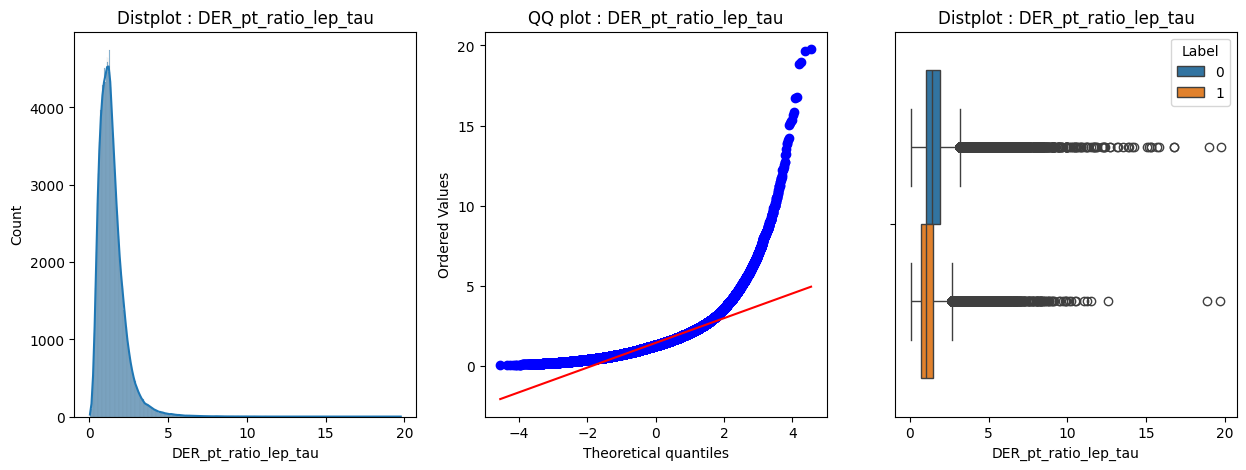

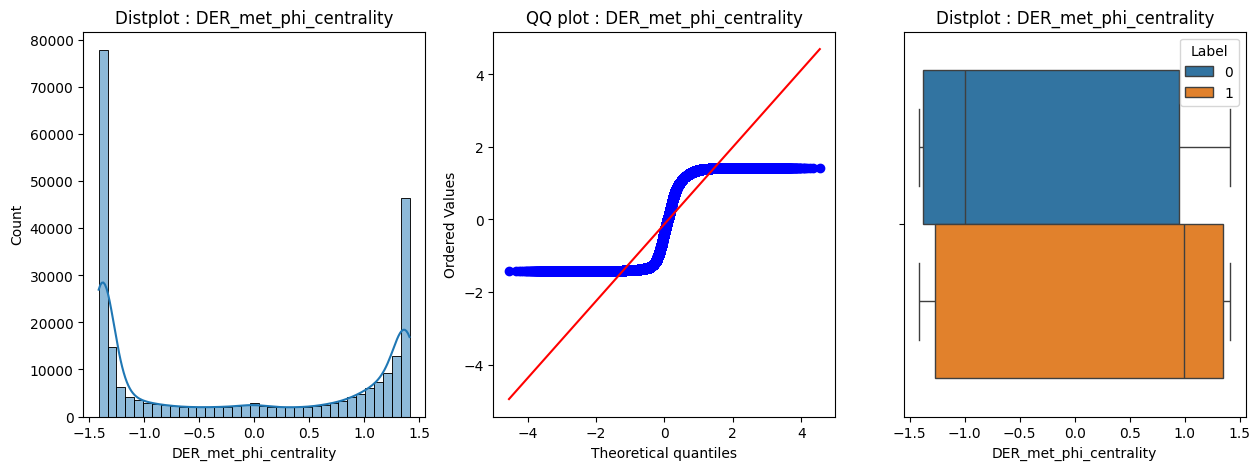

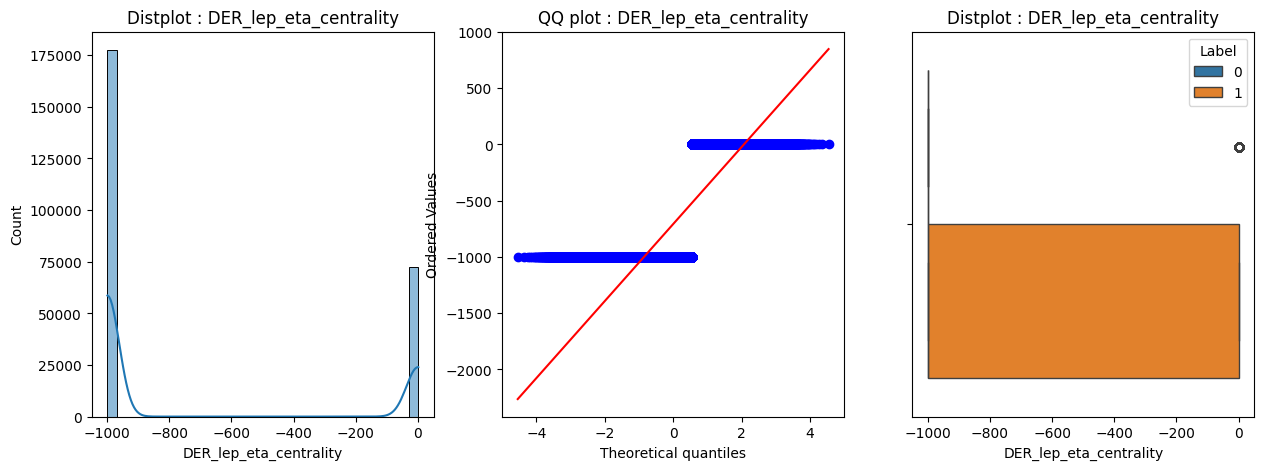

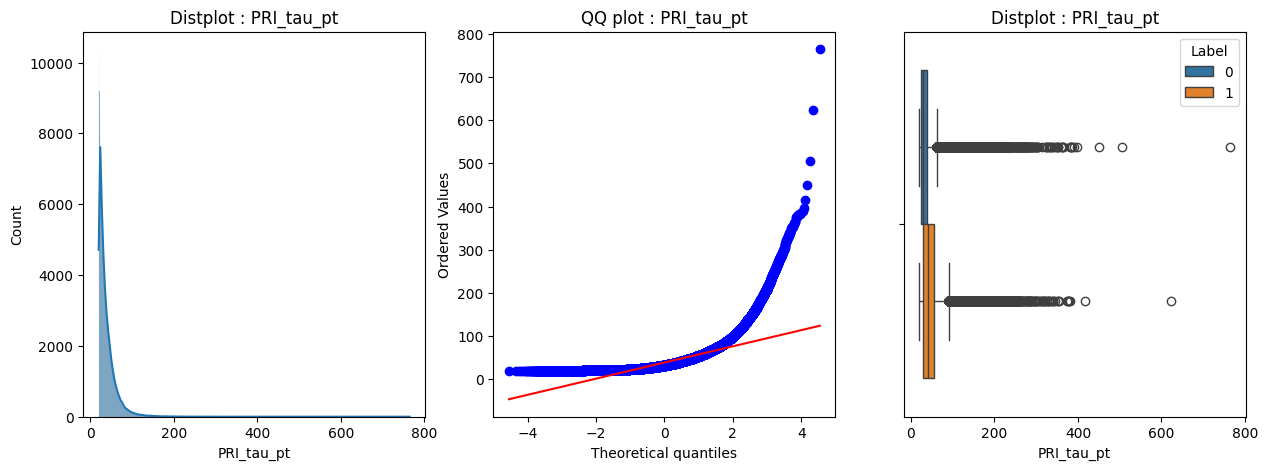

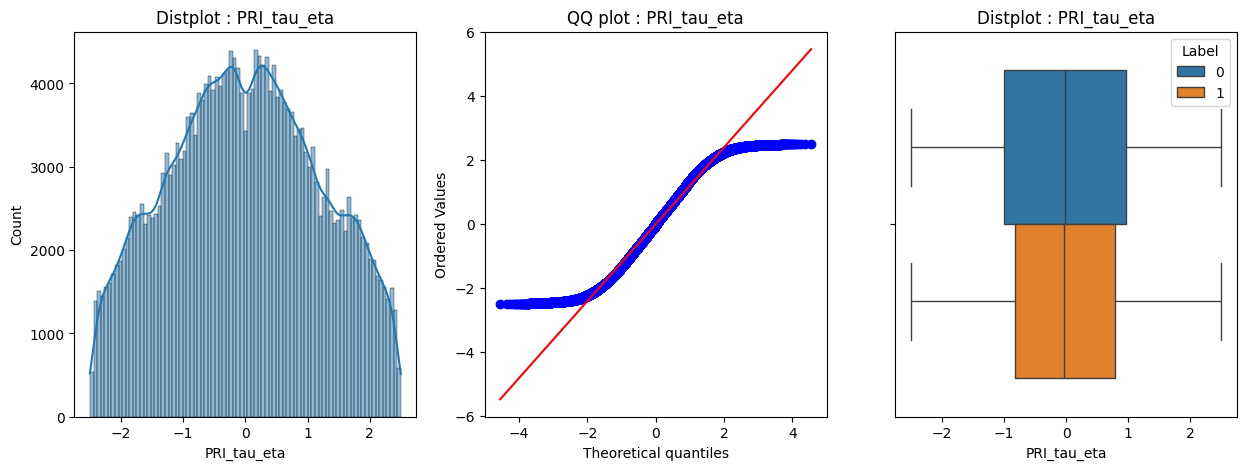

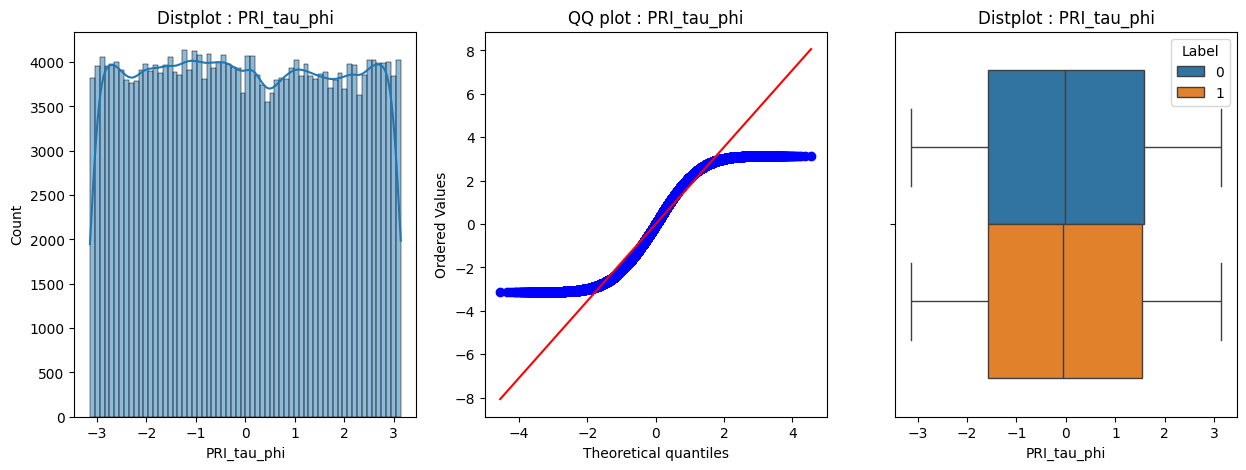

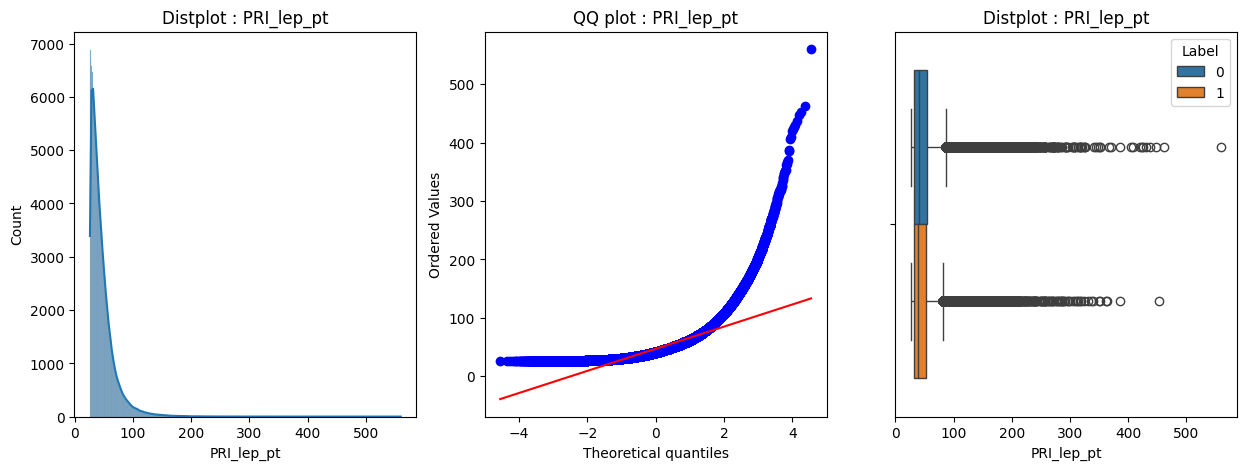

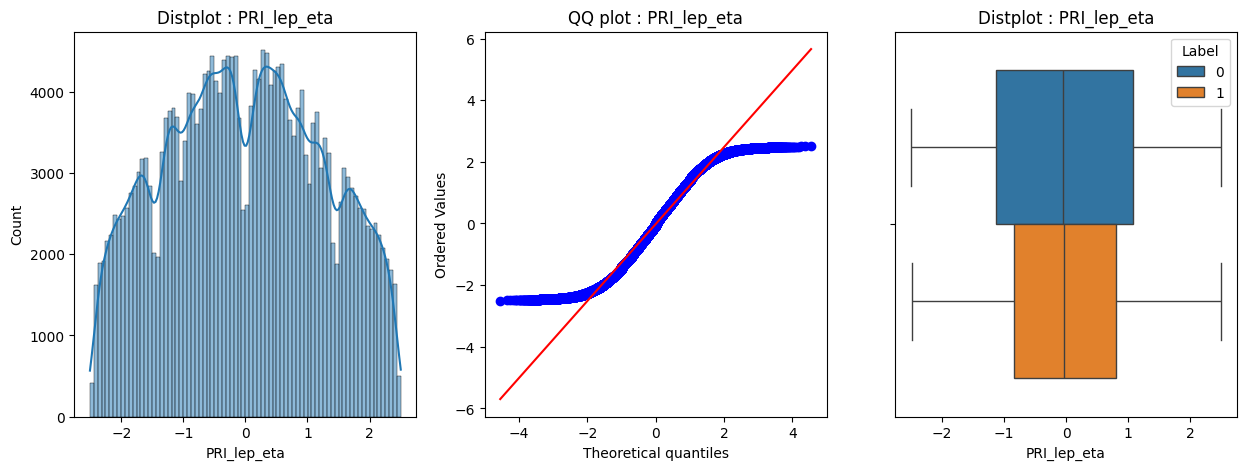

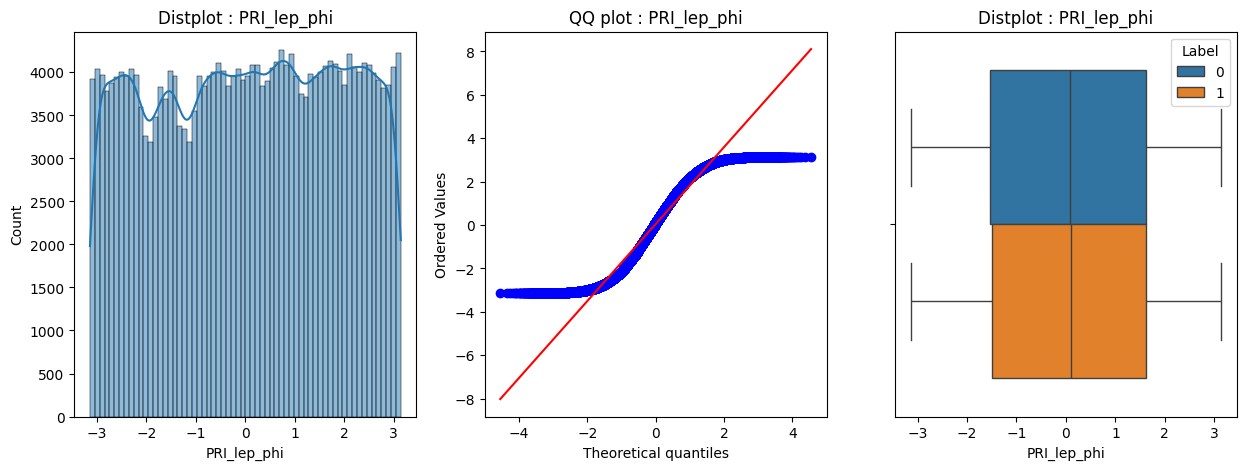

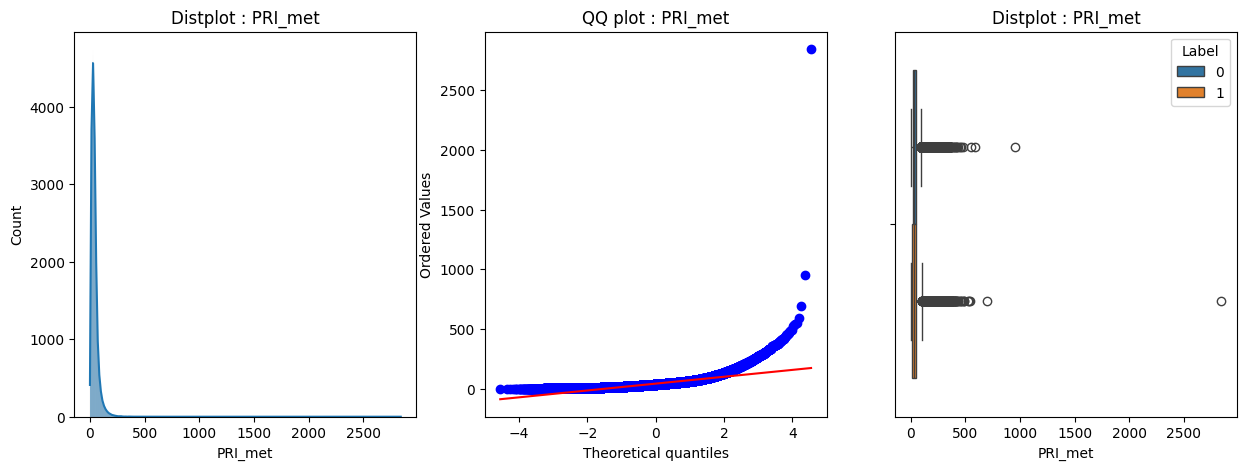

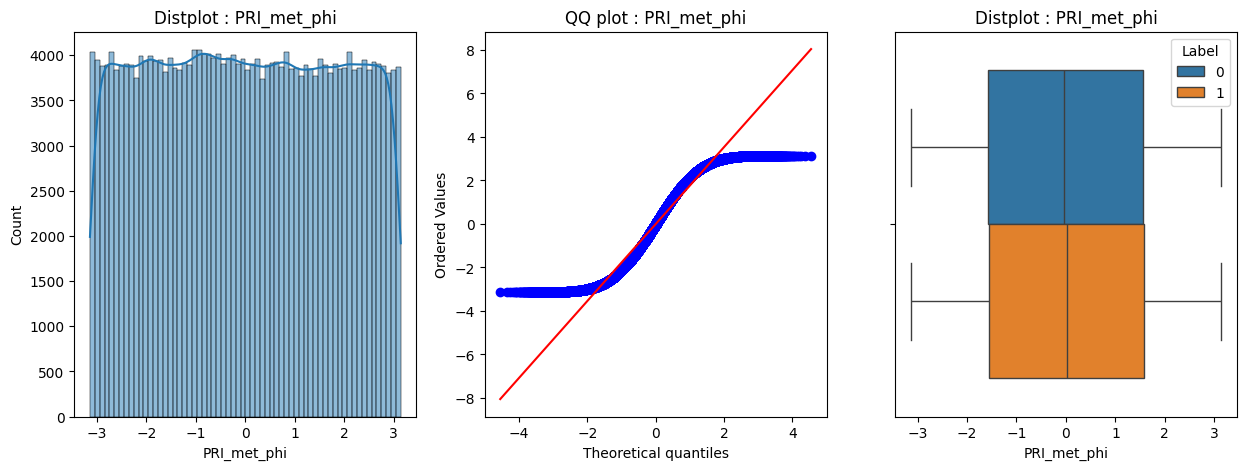

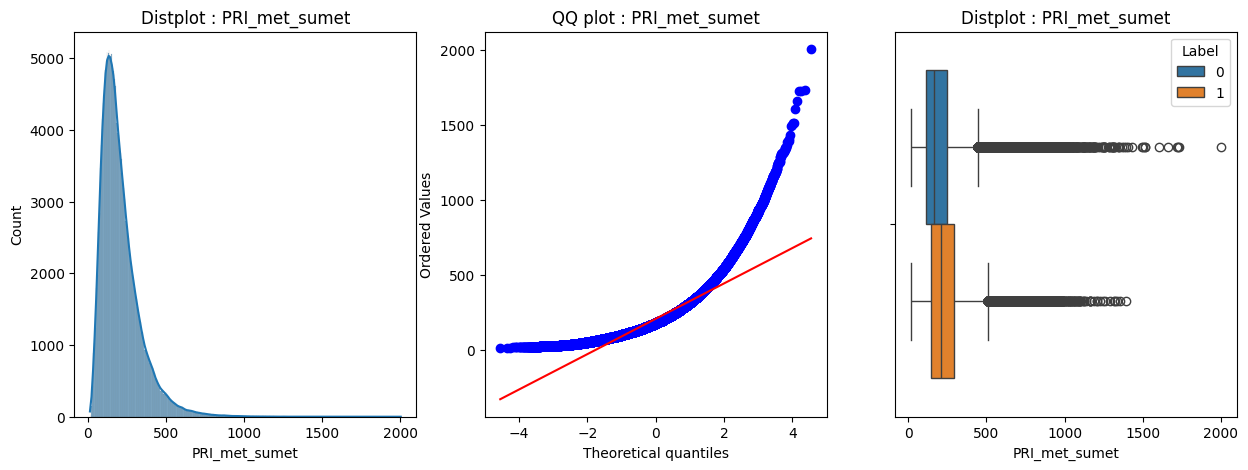

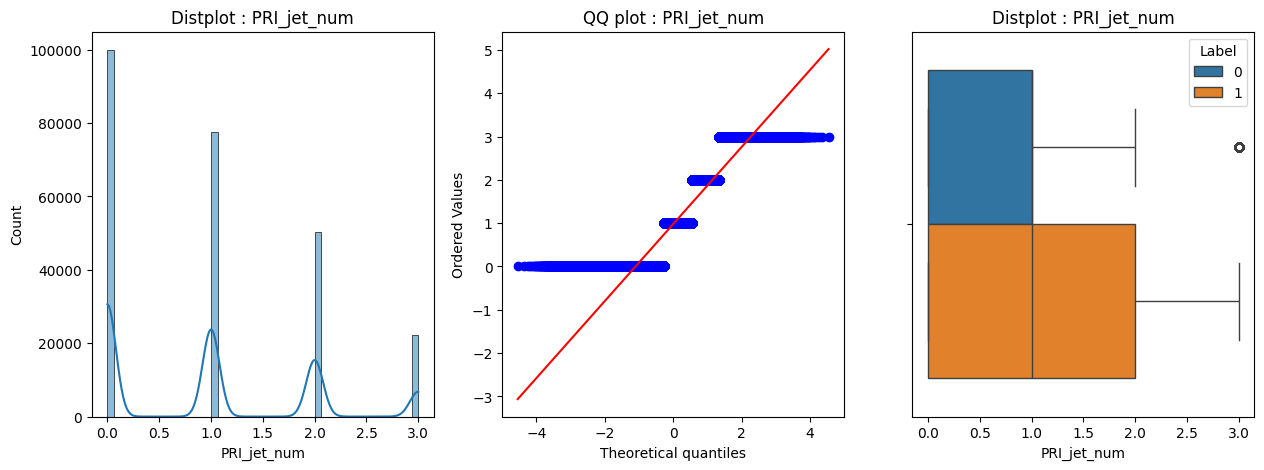

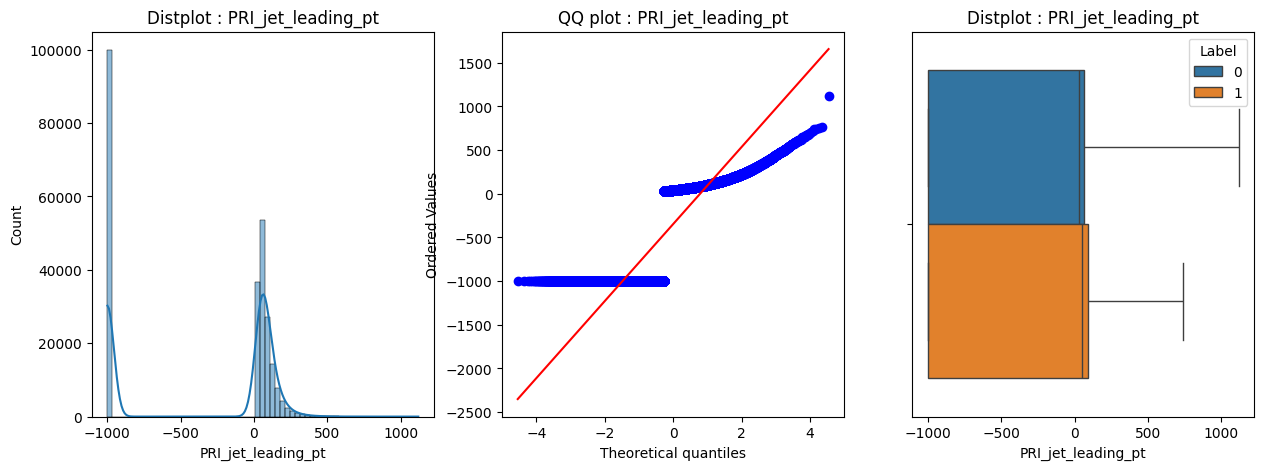

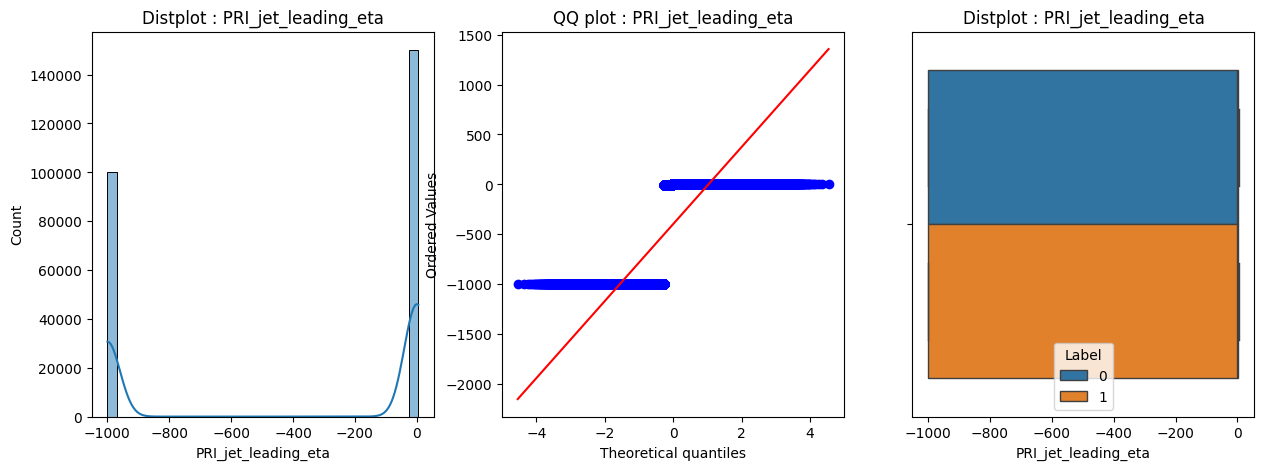

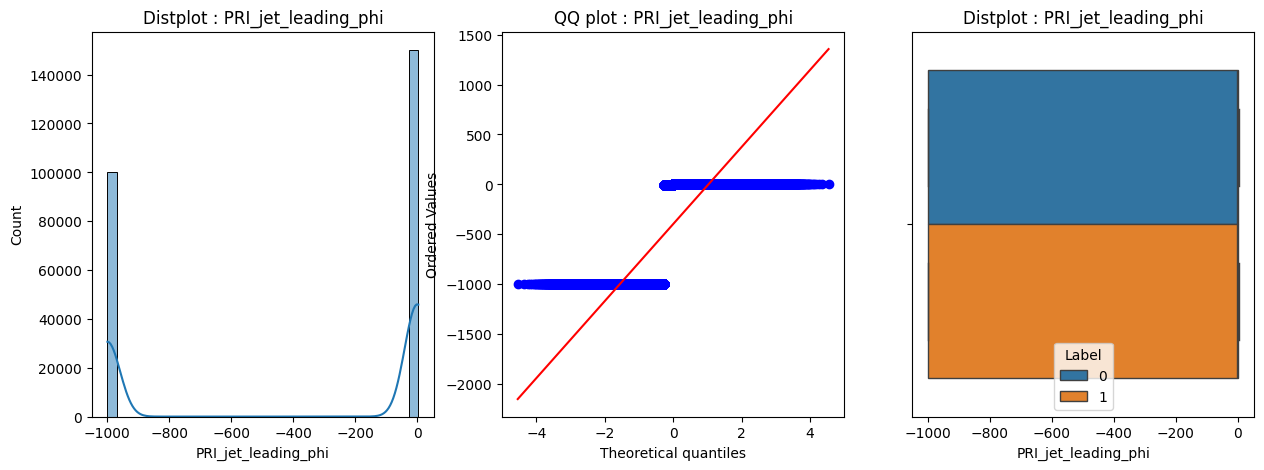

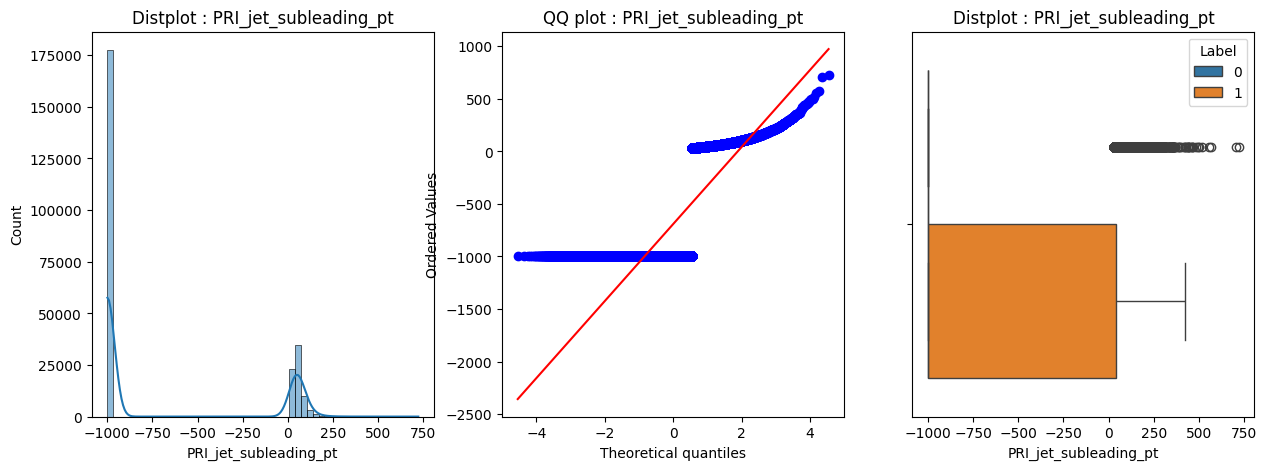

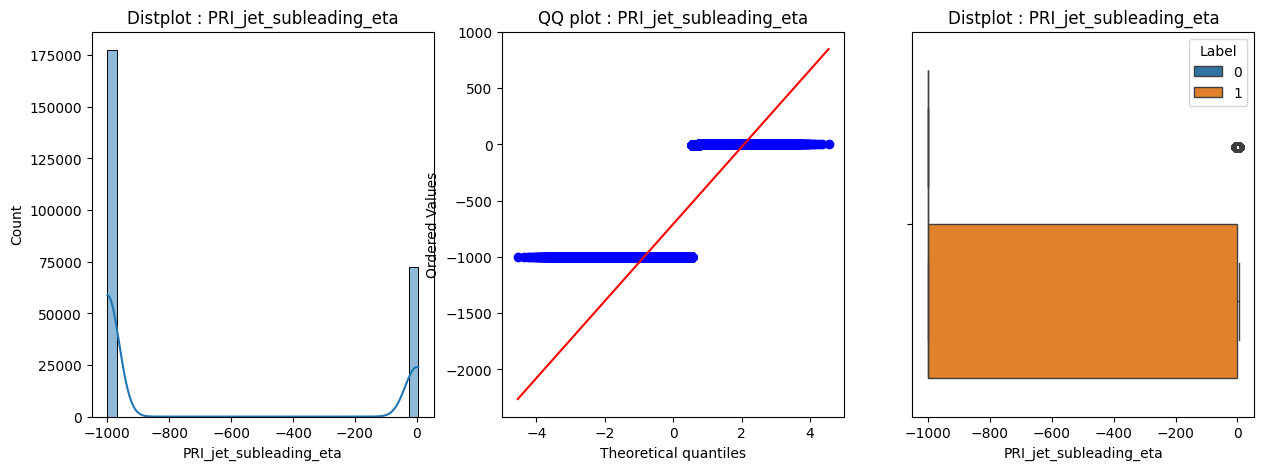

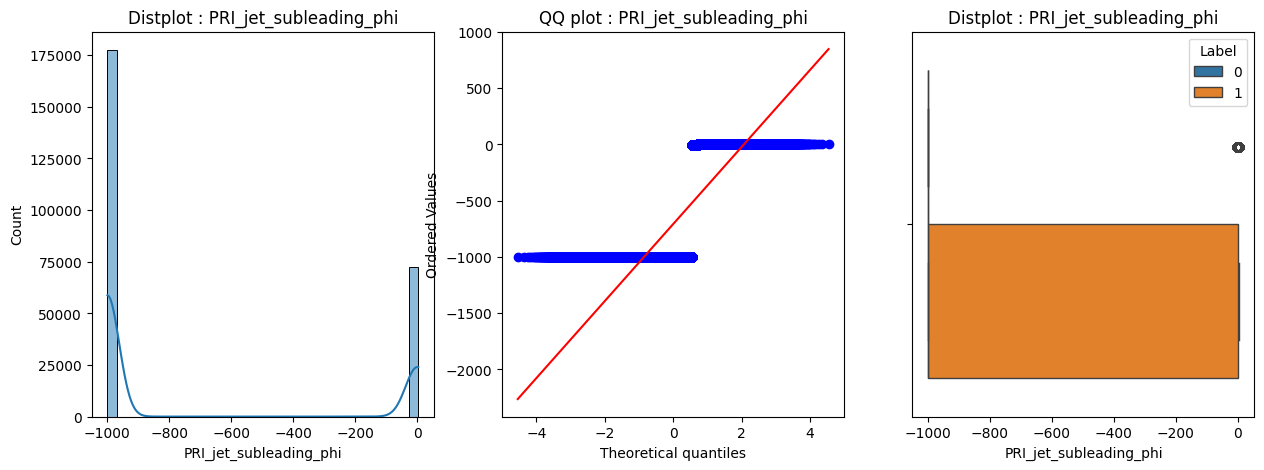

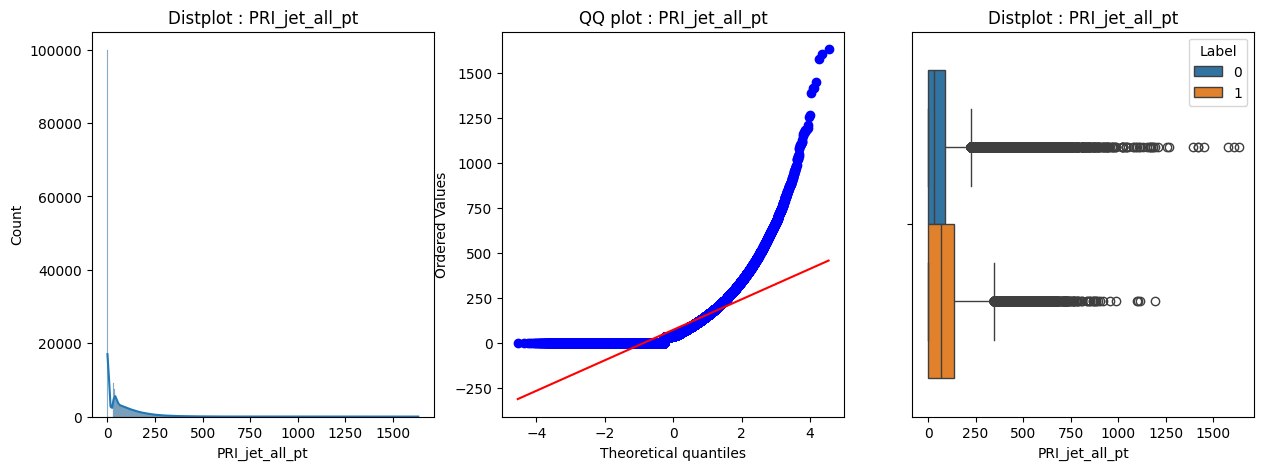

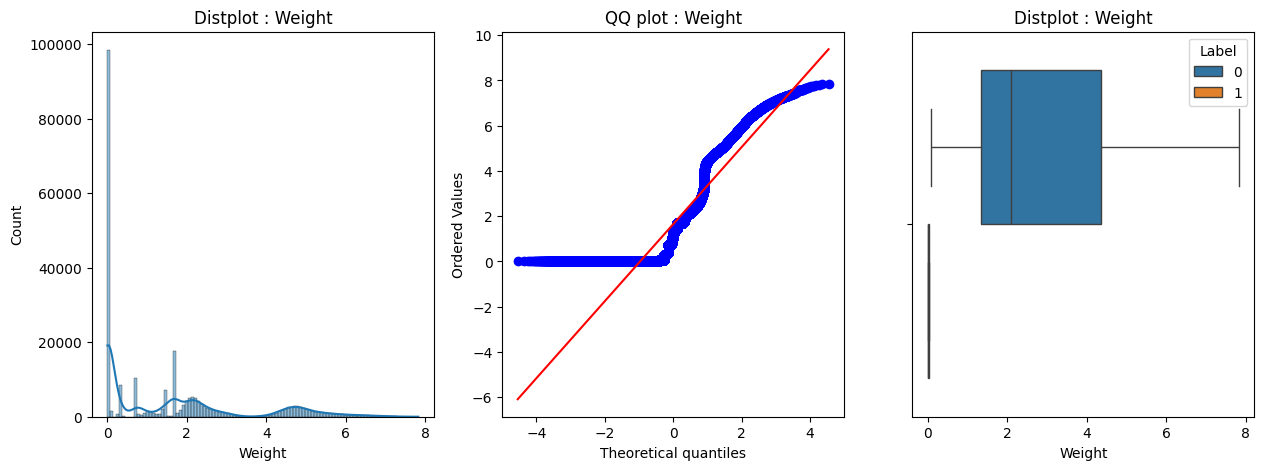

In [20]:
import scipy.stats as stats

for col in data.select_dtypes(['int', 'float']).columns :
    plt.figure(figsize=(15,5))


    plt.subplot(131)
    sns.histplot(data[col],kde=True)
    plt.title(f'Distplot : {col}')

    plt.subplot(132)
    stats.probplot(data[col],dist='norm',plot = plt)
    plt.title(f'QQ plot : {col}')

    plt.subplot(133)
    sns.boxplot( x = col , hue = 'Label' , data = data)
    plt.title(f'Distplot : {col}')

    plt.show()


# Observation from the Data and Graphs :

###   1. 'Eventid' has all unique values and does not seem to be related to the experiment Data wise

In [21]:

data.drop(['EventId'],inplace=True,axis=1)

## 2. The data has invalid values :

'DER_deltaeta_jet_jet',
'DER_mass_jet_jet',
'DER_prodeta_jet_jet',
'DER_lep_eta_centrality',
'PRI_jet_leading_pt',
'PRI_jet_leading_eta',
'PRI_jet_subleading_pt',
'PRI_jet_subleading_eta',
'PRI_jet_subleading_phi'  

These attributes hae the value of -999 present in the columns , on detailed analysis we find the follwing details :

- The papameters are physicaa quantities like mass , momentum and relative position , which cannnot be negative.

- Also the next minimum value is far greater than these which make these outliers   

These indicate that these might be filler values due to restraint in reocrding process.

We imputed two possible values -  NULL and 0.  

With 0 we saw better accuracy as compared to other values.


In [22]:
columns_to_correct  = ['DER_deltaeta_jet_jet',
'DER_mass_jet_jet',
'DER_prodeta_jet_jet',
'DER_lep_eta_centrality',
'PRI_jet_leading_pt',
'PRI_jet_leading_eta',
'PRI_jet_subleading_pt',
'PRI_jet_subleading_eta',
'PRI_jet_subleading_phi']

for column_name in columns_to_correct :
    second_smallest = data.nsmallest(2, column_name).iloc[-1][column_name]
    data[column_name] = np.where(data[column_name] == min(data[column_name]) , 0 , data[column_name])

Checking opresence of duplicates after removal of <b>Event ID</b> column.

In [23]:
data.duplicated().sum()

0

In [24]:
data.loc[:, ~data.columns.isin(['Label', 'Weight'])].head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,0.000,0.00,0.000,46.226
2,-999.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,0.000,0.00,0.000,44.251
3,143.905,81.417,80.943,0.414,9.00,0.000,0.000,3.310,0.414,75.968,...,0.060,86.062,0,0.000,0.000,-999.000,0.000,0.00,0.000,0.000
4,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,16.405,57.983,...,-0.871,53.131,0,0.000,0.000,-999.000,0.000,0.00,0.000,0.000


#### 3. Checking Correlation values for input columns . 
Any column having coorelation more than 75% with mutiple columns will be dropped.  
The datafile was extarcted for detailed inspection of the correlation matrix

In [25]:
data.corr()

 The columns found having high correlation here also have high skew in their distribution.  
Hence we decide to drop them for better model training and more feature interpretability.  
This should be done as the correlated variables interference with the features impact on the model.

In [26]:
data.drop(['PRI_jet_subleading_pt',
'PRI_jet_leading_pt',
'PRI_jet_num',
'PRI_jet_leading_phi',
'PRI_met_sumet',
'DER_pt_h',
'DER_deltaeta_jet_jet',
'DER_mass_jet_jet','PRI_jet_all_pt'],axis = 1 , inplace =True)

In [27]:
data.corr()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_jet_leading_eta,PRI_jet_subleading_eta,PRI_jet_subleading_phi,Weight,Label
DER_mass_MMC,1.000000,-0.455755,0.168548,-0.052147,0.228105,0.045826,0.201464,-0.017073,0.358963,0.125234,...,0.099445,0.010060,-0.000744,-0.233724,0.007411,0.000158,-0.001166,-0.002723,-0.327244,0.239149
DER_mass_transverse_met_lep,-0.455755,1.000000,0.190109,0.100320,0.043251,0.017758,-0.146837,0.349504,-0.419757,-0.165878,...,0.310648,-0.006777,0.000340,0.183716,-0.015925,0.000313,0.001859,0.003925,0.419843,-0.351428
DER_mass_vis,0.168548,0.190109,1.000000,0.024383,0.579712,-0.000702,0.088685,0.097490,-0.090846,-0.044084,...,0.405482,0.002196,-0.002018,-0.087330,-0.001467,0.002092,0.001390,-0.000365,0.102172,-0.014055
DER_prodeta_jet_jet,-0.052147,0.100320,0.024383,1.000000,0.062400,0.026580,-0.118969,0.034612,-0.119341,-0.527090,...,-0.005085,0.000175,0.000111,-0.050828,0.000422,-0.002021,-0.001551,0.002233,0.130087,-0.189891
DER_deltar_tau_lep,0.228105,0.043251,0.579712,0.062400,1.000000,-0.148081,-0.432603,0.047046,-0.205441,-0.214810,...,-0.069957,0.000699,-0.000776,-0.402345,-0.001570,0.000232,0.002510,0.004132,0.197881,0.012245
DER_pt_tot,0.045826,0.017758,-0.000702,0.026580,-0.148081,1.000000,0.381160,0.039193,0.178448,0.125701,...,0.109617,0.007987,-0.004249,0.269739,0.002515,-0.005526,-0.000806,-0.003661,-0.219507,-0.015287
DER_sum_pt,0.201464,-0.146837,0.088685,-0.118969,-0.432603,0.381160,1.000000,0.108791,0.420679,0.451309,...,0.460938,0.008781,-0.001892,0.520129,0.006712,0.000109,-0.003600,-0.005825,-0.414827,0.153236
DER_pt_ratio_lep_tau,-0.017073,0.349504,0.097490,0.034612,0.047046,0.039193,0.108791,1.000000,-0.038803,-0.000122,...,0.701142,0.002357,-0.005053,0.053386,-0.001186,0.002851,0.001815,0.002870,0.188398,-0.195398
DER_met_phi_centrality,0.358963,-0.419757,-0.090846,-0.119341,-0.205441,0.178448,0.420679,-0.038803,1.000000,0.289502,...,0.054047,0.012423,0.000278,0.180756,0.009896,0.002996,-0.003539,-0.006332,-0.472163,0.271752
DER_lep_eta_centrality,0.125234,-0.165878,-0.044084,-0.527090,-0.214810,0.125701,0.451309,-0.000122,0.289502,1.000000,...,0.099523,0.004479,0.000179,0.206018,0.004163,-0.000988,-0.002390,-0.001420,-0.314403,0.223175


Now we see that the model features coorellation in within reasonable limits.

### To treat the skew  , we use Yeo - Johnson transformations.

In [28]:
data.skew()

DER_mass_MMC                   -1.854718
DER_mass_transverse_met_lep     1.219211
DER_mass_vis                    3.790262
DER_prodeta_jet_jet            -1.441259
DER_deltar_tau_lep             -0.215782
DER_pt_tot                     10.579309
DER_sum_pt                      2.320647
DER_pt_ratio_lep_tau            2.633521
DER_met_phi_centrality          0.151136
DER_lep_eta_centrality          2.046247
PRI_tau_pt                      3.755191
PRI_tau_eta                     0.017852
PRI_tau_phi                     0.013872
PRI_lep_pt                      3.240762
PRI_lep_eta                     0.021623
PRI_lep_phi                    -0.045746
PRI_met                         5.270755
PRI_met_phi                     0.007908
PRI_jet_leading_eta            -0.002645
PRI_jet_subleading_eta         -0.032389
PRI_jet_subleading_phi          0.003237
Weight                          0.990633
Label                           0.663011
dtype: float64

In [29]:

from sklearn.preprocessing import PowerTransformer
from scipy.stats import yeojohnson



df = data.copy()
columns = df.columns

transformer = PowerTransformer(method='yeo-johnson')

df.loc[:, ~df.columns.isin(['Label'])] =  transformer.fit_transform(df.loc[:, ~df.columns.isin(['Label'])])




The some features still have high coorelation. 
We use the transformer once again on these. 

In [30]:
df.skew()[(df.skew() > 0.5) | (df.skew()  < -0.5) ].index

Index(['DER_mass_MMC', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality',
       'Label'],
      dtype='object')

In [31]:
columns_to_normalize  = ['DER_mass_MMC','DER_prodeta_jet_jet', 'DER_lep_eta_centrality']


# Fit and transform the selected columns
df[columns_to_normalize] = transformer.fit_transform(df[columns_to_normalize])


In [32]:
df.skew()

DER_mass_MMC                   0.261186
DER_mass_transverse_met_lep   -0.122328
DER_mass_vis                  -0.007553
DER_prodeta_jet_jet            0.314206
DER_deltar_tau_lep            -0.043093
DER_pt_tot                    -0.030383
DER_sum_pt                     0.075149
DER_pt_ratio_lep_tau           0.001588
DER_met_phi_centrality         0.109213
DER_lep_eta_centrality         1.414898
PRI_tau_pt                     0.149571
PRI_tau_eta                    0.001957
PRI_tau_phi                    0.001937
PRI_lep_pt                     0.115022
PRI_lep_eta                    0.004813
PRI_lep_phi                   -0.011623
PRI_met                        0.021991
PRI_met_phi                    0.001819
PRI_jet_leading_eta            0.001016
PRI_jet_subleading_eta         0.005828
PRI_jet_subleading_phi         0.000237
Weight                         0.126641
Label                          0.663011
dtype: float64

#### The data has descent amount of outliers , but we keep them to for classfication models .  

In [33]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return (len(outliers)/len(df))*100

for i in data.select_dtypes(['int', 'float']).columns :
    print(f'Outlier % for {i} : {find_outliers_IQR(data[i])}')

Outlier % for DER_mass_MMC : 19.7428
Outlier % for DER_mass_transverse_met_lep : 0.74
Outlier % for DER_mass_vis : 5.8444
Outlier % for DER_prodeta_jet_jet : 28.993999999999996
Outlier % for DER_deltar_tau_lep : 0.2576
Outlier % for DER_pt_tot : 3.4528000000000003
Outlier % for DER_sum_pt : 4.9155999999999995
Outlier % for DER_pt_ratio_lep_tau : 3.8264
Outlier % for DER_met_phi_centrality : 0.0
Outlier % for DER_lep_eta_centrality : 22.7164
Outlier % for PRI_tau_pt : 5.57
Outlier % for PRI_tau_eta : 0.0
Outlier % for PRI_tau_phi : 0.0
Outlier % for PRI_lep_pt : 5.3736
Outlier % for PRI_lep_eta : 0.0
Outlier % for PRI_lep_phi : 0.0
Outlier % for PRI_met : 5.3196
Outlier % for PRI_met_phi : 0.0
Outlier % for PRI_jet_leading_eta : 22.4696
Outlier % for PRI_jet_subleading_eta : 29.0136
Outlier % for PRI_jet_subleading_phi : 29.0132
Outlier % for Weight : 2.1808


We run the data through <b>Robust Scaler()</b> to bring it closer to Normal distribution.

In [34]:

from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Fit the scaler to your data and transform the data
df.loc[:, ~df.columns.isin(['Label'])] =  scaler.fit_transform(df.loc[:, ~df.columns.isin(['Label'])])

In [35]:
df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_jet_leading_eta', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'Weight', 'Label'],
      dtype='object')

## Final Data looks like this after Preprocessing

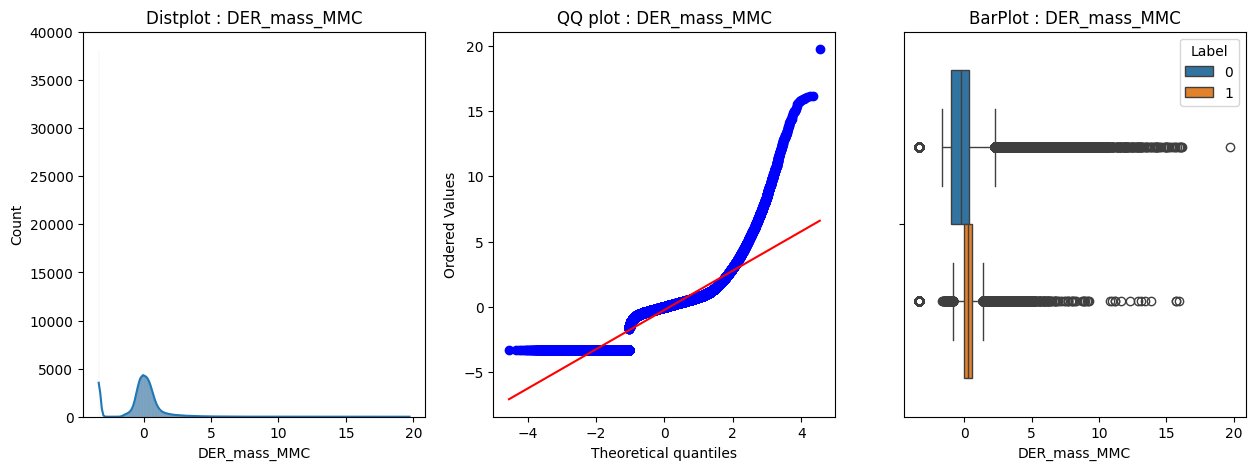

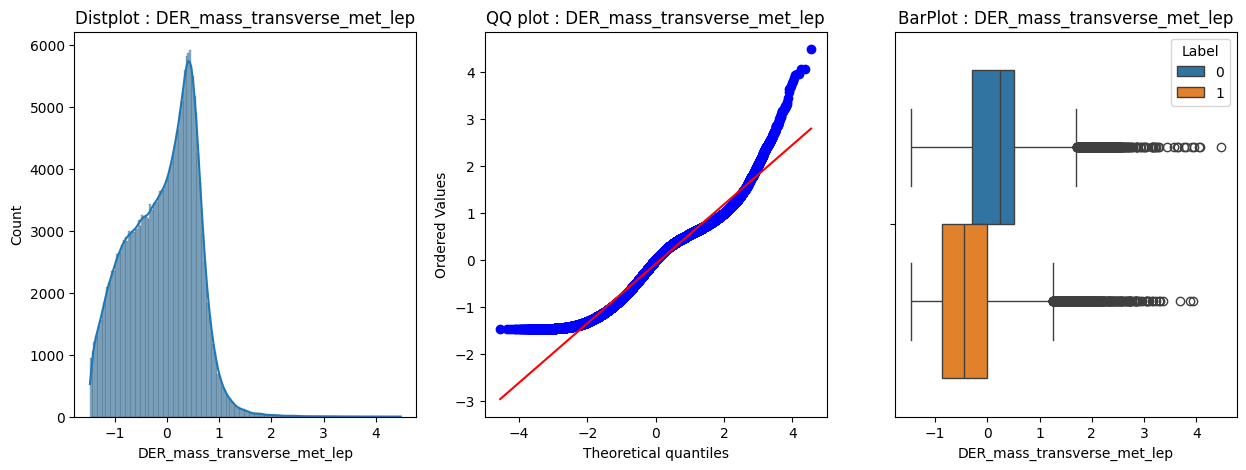

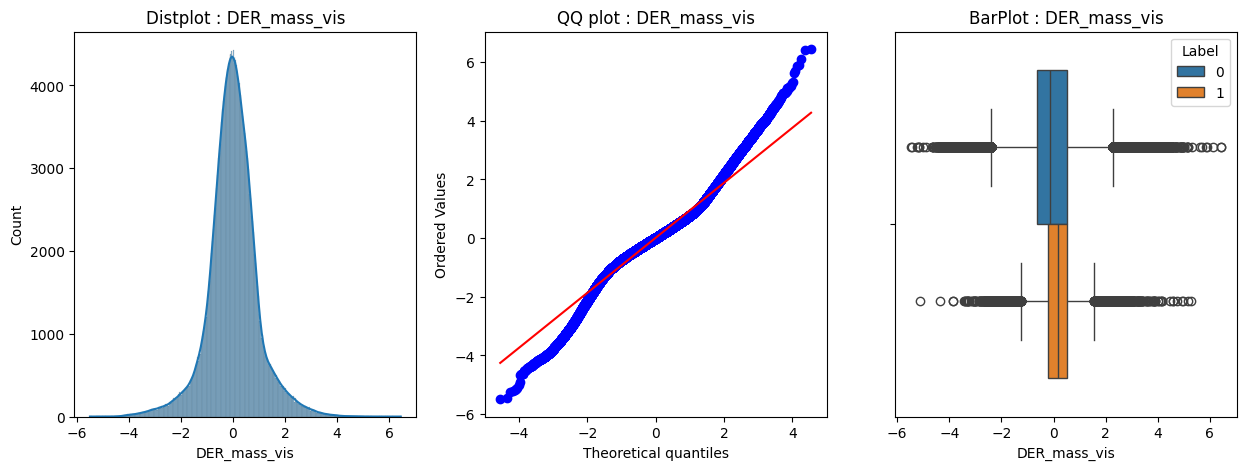

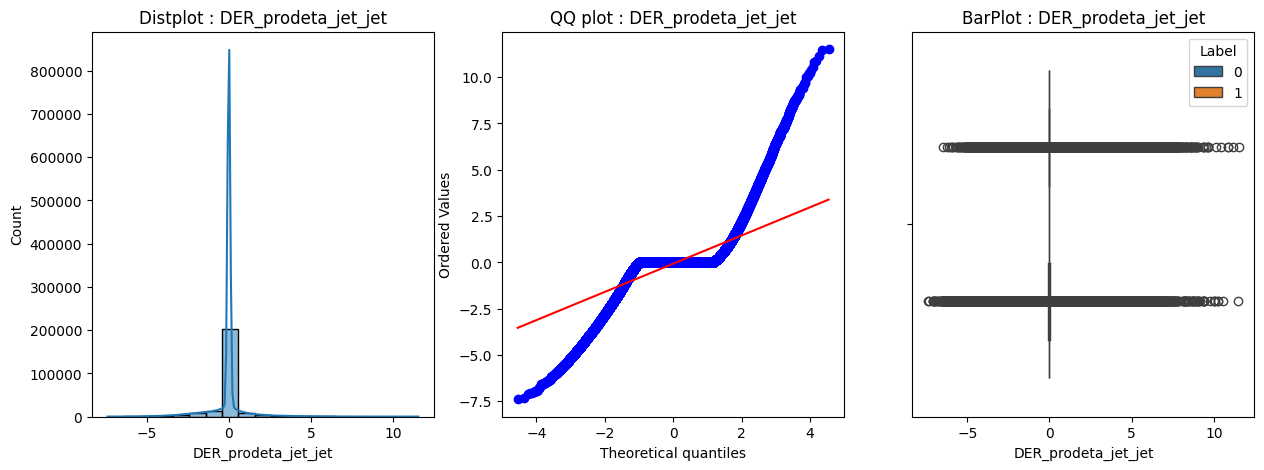

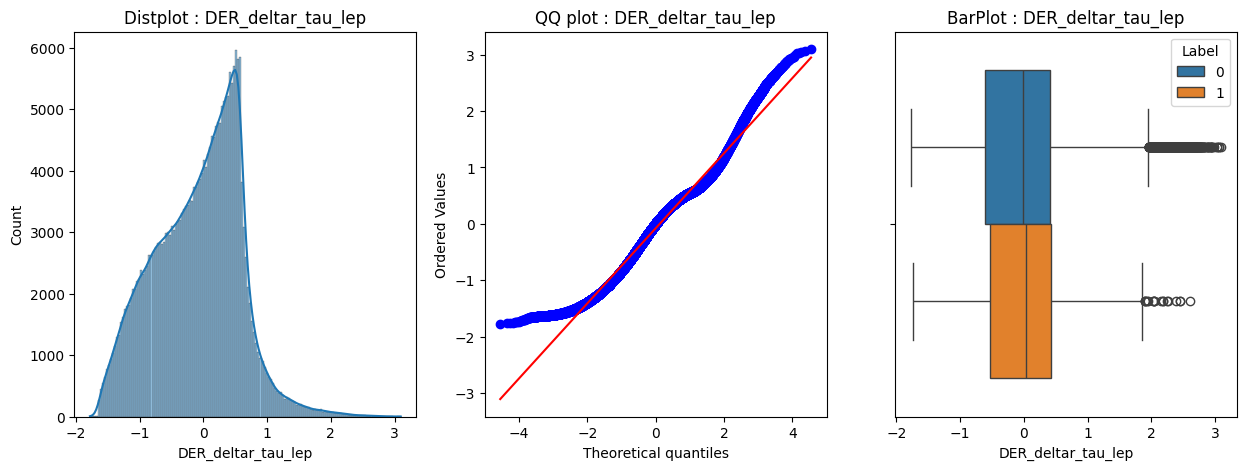

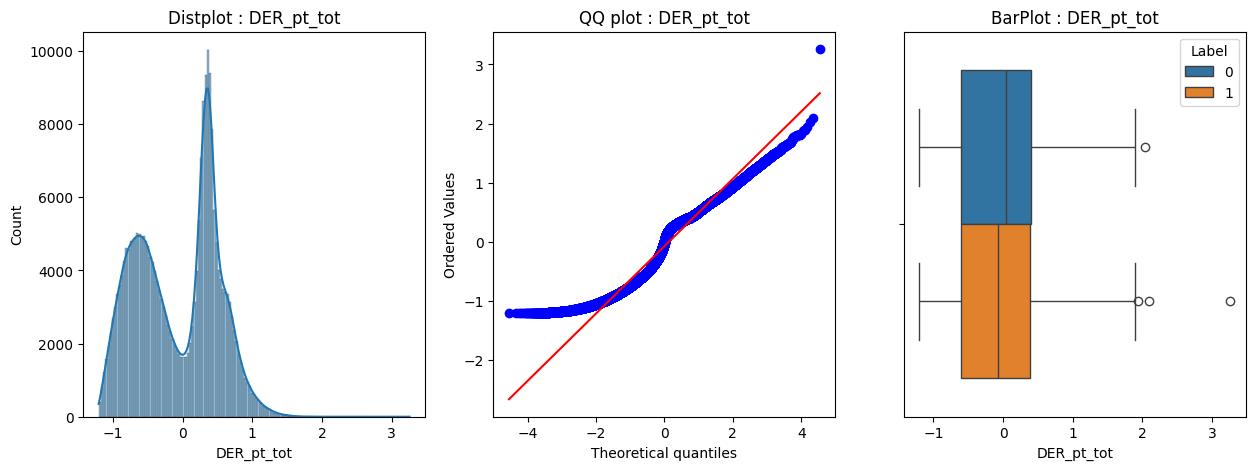

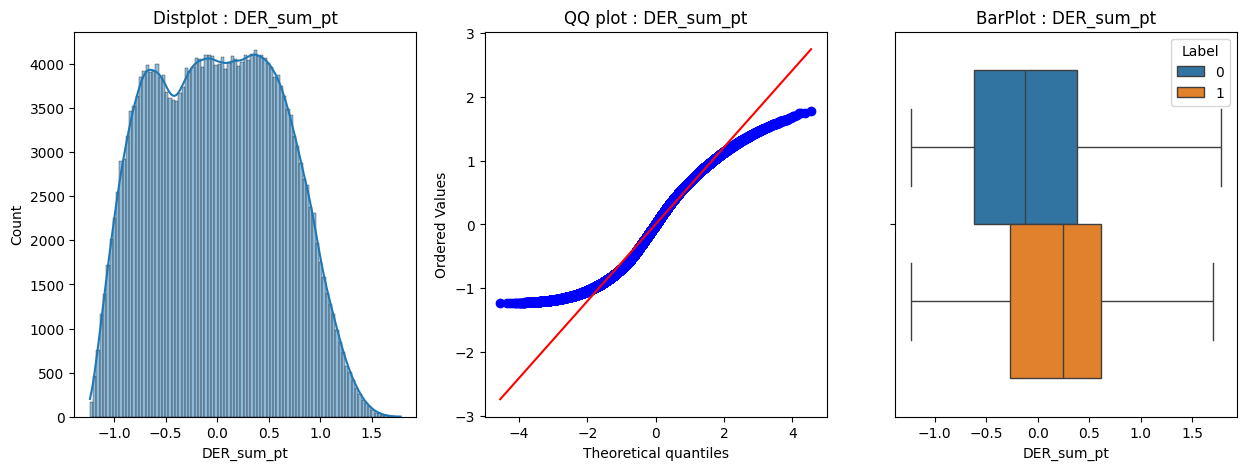

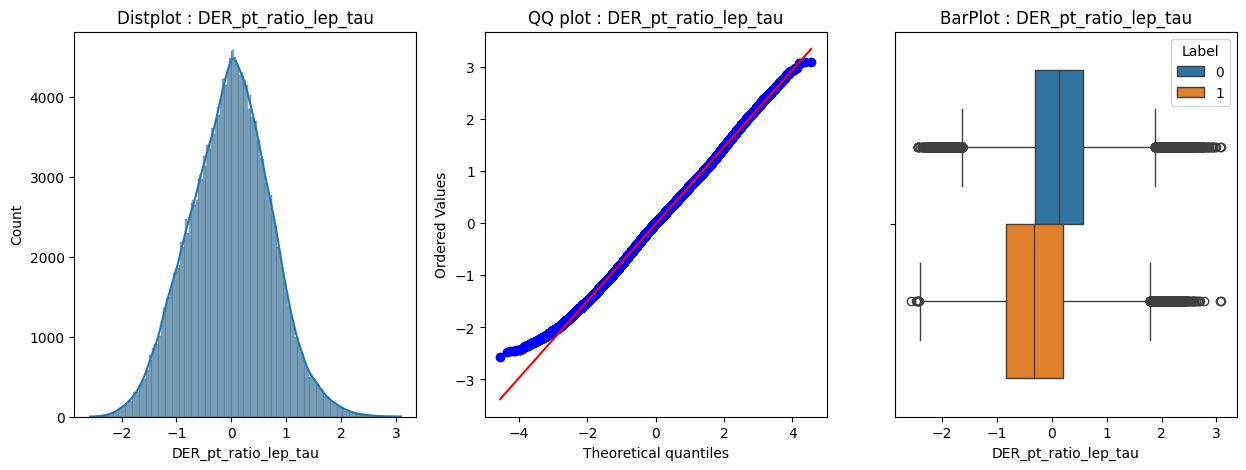

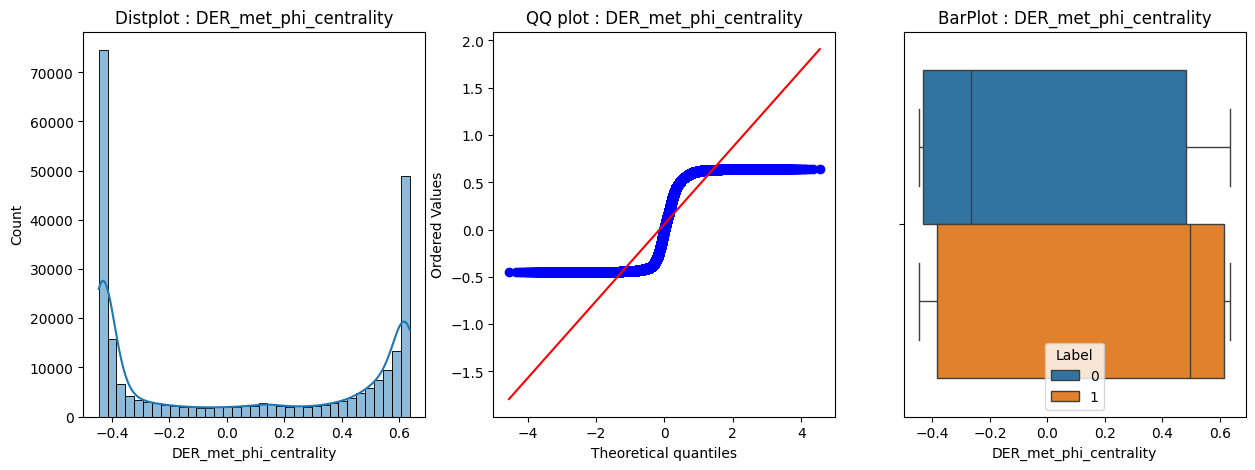

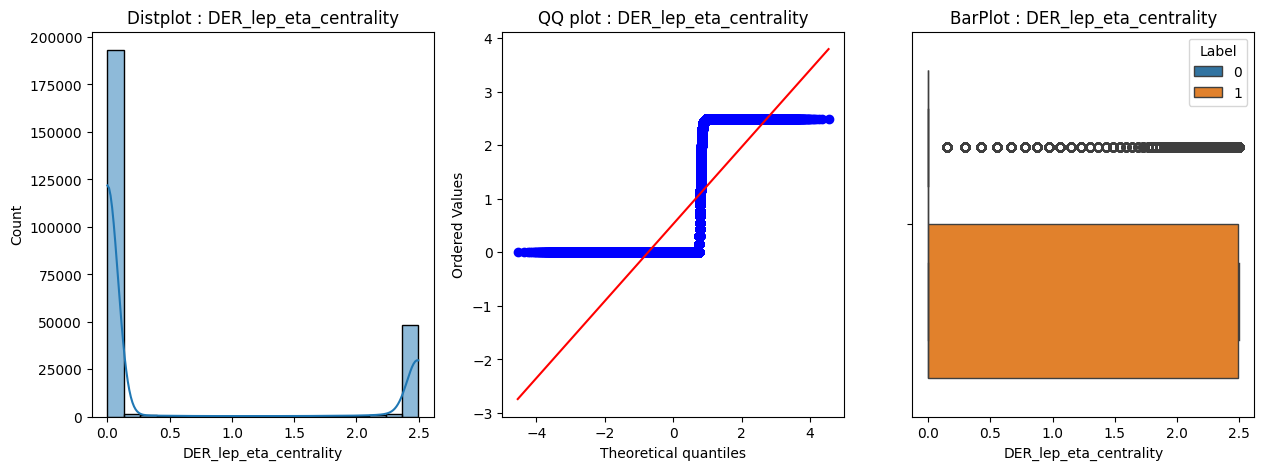

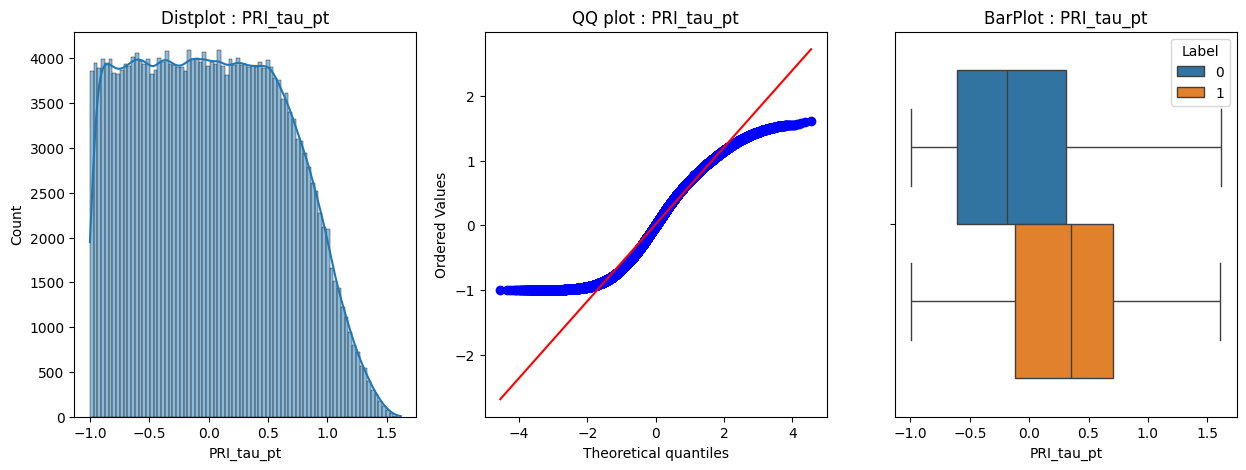

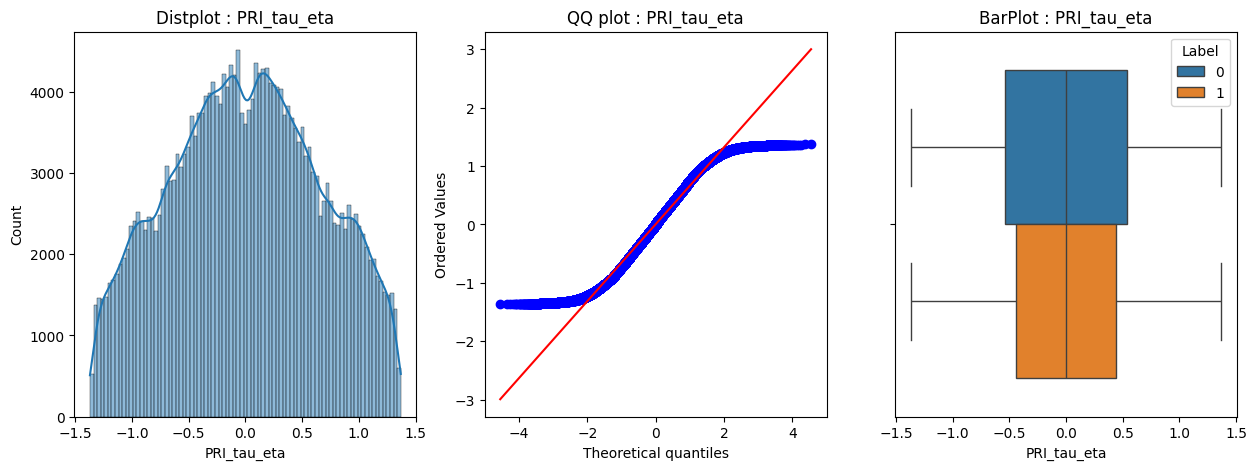

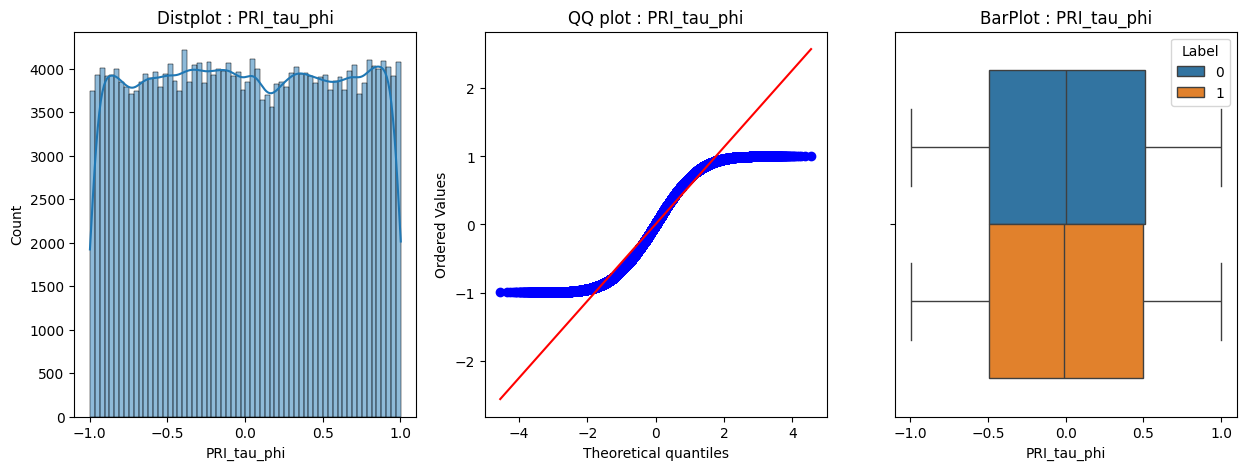

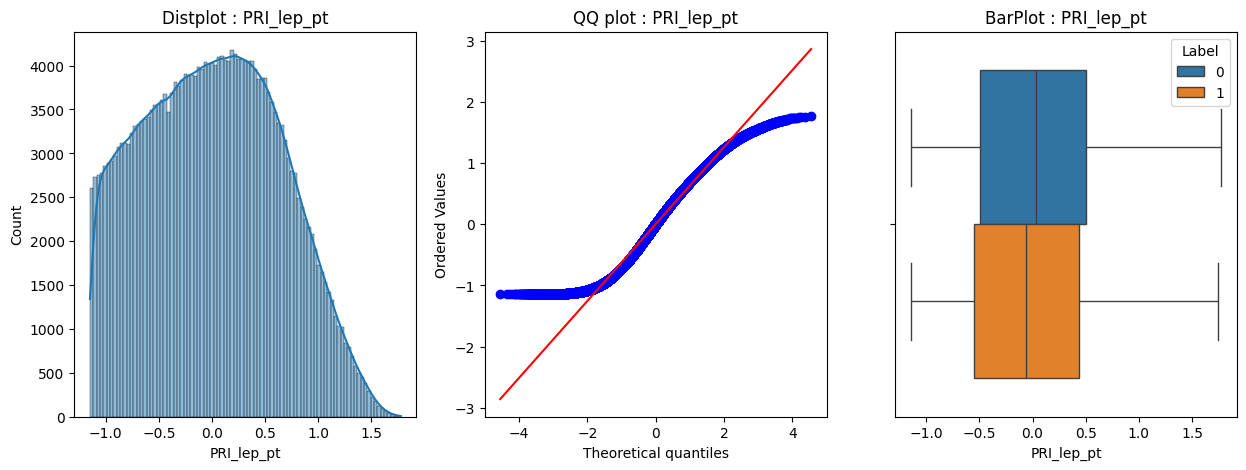

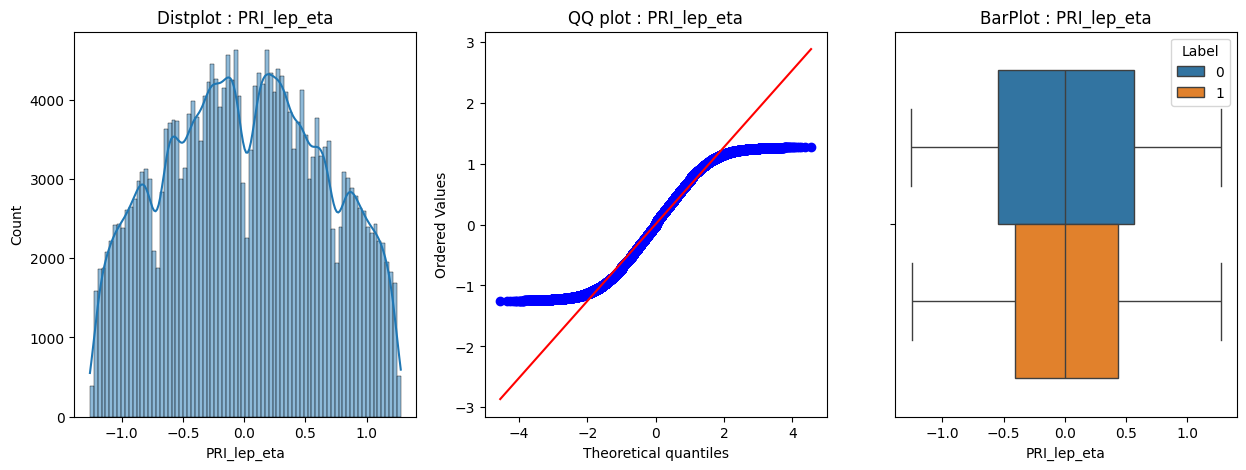

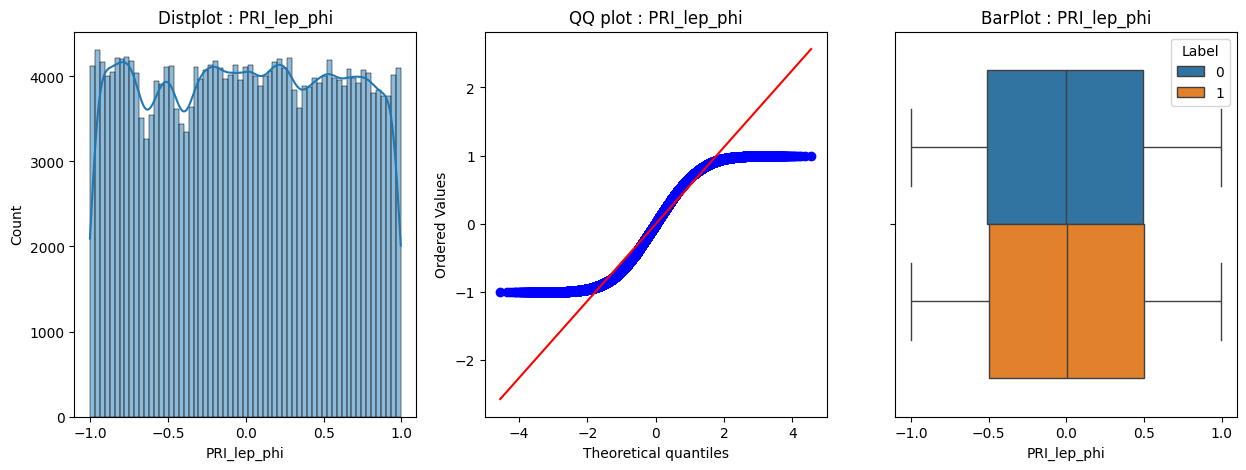

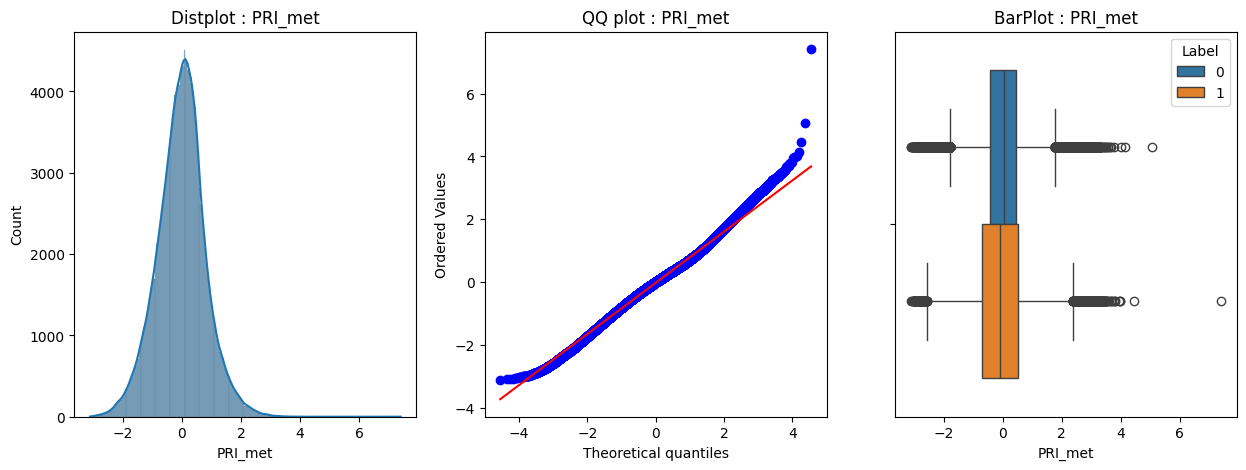

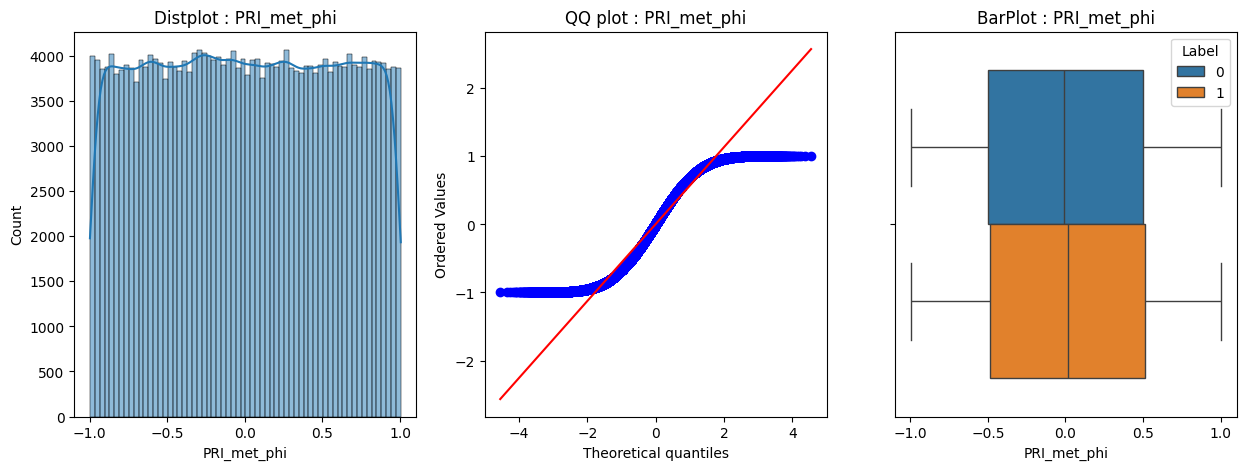

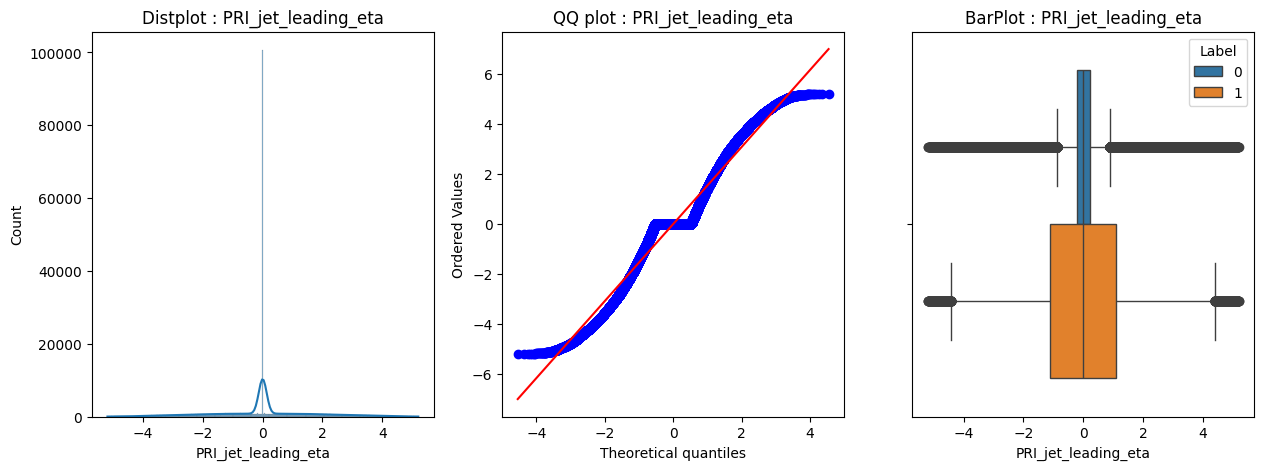

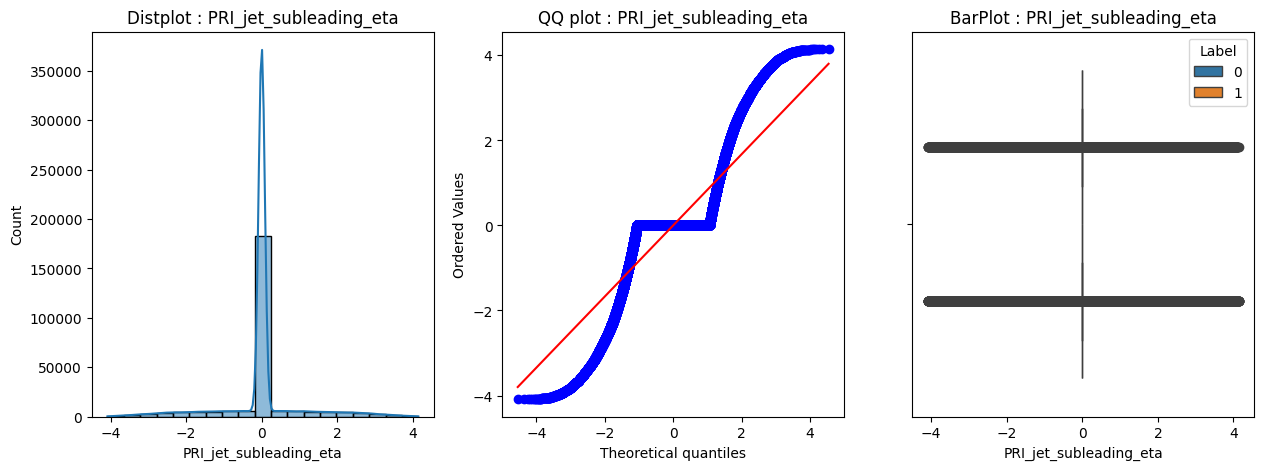

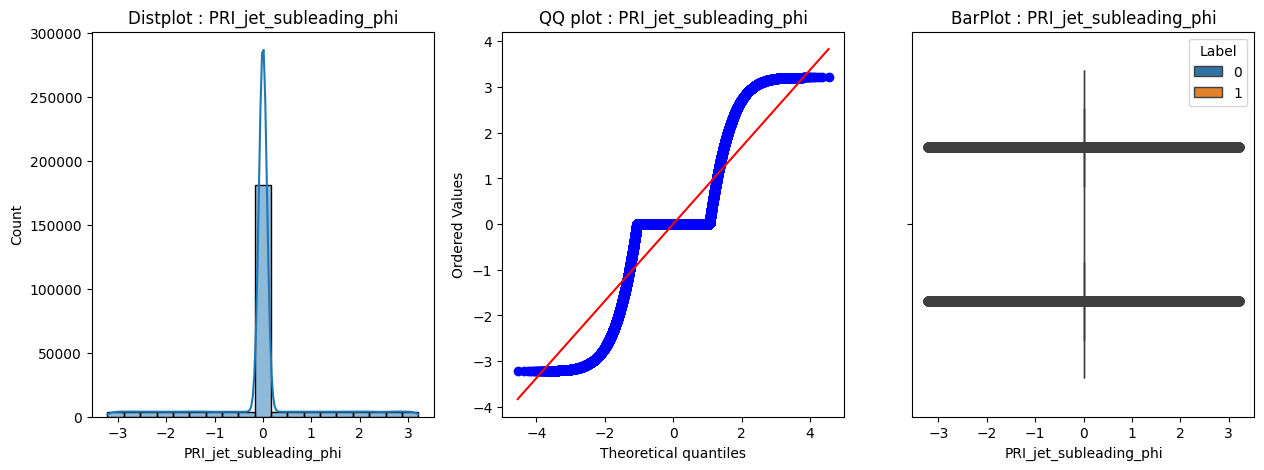

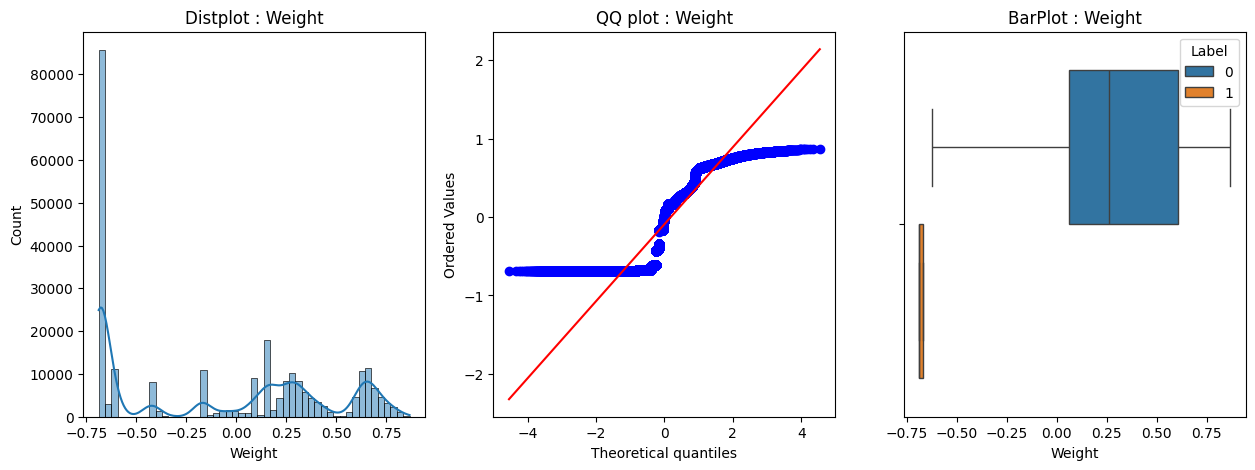

In [36]:
import scipy.stats as stats

for col in df.select_dtypes(['int', 'float']).columns :
    plt.figure(figsize=(15,5))


    plt.subplot(131)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distplot : {col}')

    plt.subplot(132)
    stats.probplot(df[col],dist='norm',plot = plt)
    plt.title(f'QQ plot : {col}')

    plt.subplot(133)
    sns.boxplot( x = col , hue = 'Label' , data = df)
    plt.title(f'BarPlot : {col}')

    plt.show()


Now we will start testing various algorithms on the data. 

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier 
- SDG Classifier
- Extreme Gradient Boosting
- Gradient Boosting
- Deep Neural Network

Please note we will be using the <b>'Weight'</b> parameter as it provide expert opininon on weightage of an event.

## Splitting the data into Train and Test Datasets

In [37]:
x = df.drop(['Label'],axis=1)
y = df['Label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101,stratify=y)

### Creating a Function to run all accuracy tests

In [38]:
def accuracy(y_train ,y_test ,y_pred_train ,  y_pred_test ):

    print('Confusion Matrix : ')
    print(f'Train : \n {confusion_matrix(y_train, y_pred_train)}')
    print("*********"*5)
    print(f'Test : \n {confusion_matrix(y_test, y_pred_test)}')
    print()

    print('Classification Report : ')
    print(f'Train : \n {classification_report(y_train, y_pred_train)}')
    print("*********"*5)
    print(f'Test : \n {classification_report(y_test, y_pred_test)}')
    print()

    print('Accuracy Score : ')
    print(f'Train : \n {accuracy_score(y_train, y_pred_train)}')
    print("*********"*5)
    print(f'Test : \n {accuracy_score(y_test, y_pred_test)}')

## Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression(max_iter=1000 , solver = 'lbfgs').fit(x_train,  y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train ,  y_pred_test)

Confusion Matrix : 
Train : 
 [[114878    155]
 [     5  59962]]
*********************************************
Test : 
 [[49240    60]
 [    1 25699]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115033
           1       1.00      1.00      1.00     59967

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49300
           1       1.00      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000


Accuracy Score : 
Train : 
 0.9990857142857142
*********************************************
Test : 
 0

## Weightage of Input features

In [40]:
pd.DataFrame({'Columns':x_train.columns  , 'Weights': lr.coef_[0]}).sort_values(by='Weights')

,Columns,Weights
21,Weight,-79.890029
6,DER_sum_pt,-1.401568
5,DER_pt_tot,-0.682766
0,DER_mass_MMC,-0.148058
9,DER_lep_eta_centrality,-0.132652
1,DER_mass_transverse_met_lep,-0.074923
3,DER_prodeta_jet_jet,-0.047589
17,PRI_met_phi,-0.021797
14,PRI_lep_eta,-0.015288
18,PRI_jet_leading_eta,-0.005175


## DecisionTree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 15)
dtc.fit(x_train,y_train)

y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[115033      0]
 [     0  59967]]
*********************************************
Test : 
 [[49300     0]
 [    0 25700]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115033
           1       1.00      1.00      1.00     59967

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49300
           1       1.00      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000


Accuracy Score : 
Train : 
 1.0
*********************************************
Test : 
 1.0


## Weightage of Input features

In [42]:
dtc_feature_imp = sorted(dict(zip(dtc.feature_names_in_ , dtc.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(dtc_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,Weight,1.0
1,DER_mass_MMC,0.0
2,DER_mass_transverse_met_lep,0.0
3,DER_mass_vis,0.0
4,DER_prodeta_jet_jet,0.0
5,DER_deltar_tau_lep,0.0
6,DER_pt_tot,0.0
7,DER_sum_pt,0.0
8,DER_pt_ratio_lep_tau,0.0
9,DER_met_phi_centrality,0.0


## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=15).fit(x_train,y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[115033      0]
 [     0  59967]]
*********************************************
Test : 
 [[49300     0]
 [    0 25700]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115033
           1       1.00      1.00      1.00     59967

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49300
           1       1.00      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000


Accuracy Score : 
Train : 
 1.0
*********************************************
Test : 
 1.0


## Weightage of Input features

In [44]:
rfc_feature_imp = sorted(dict(zip(rfc.feature_names_in_ , rfc.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(rfc_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,Weight,0.752199
1,DER_mass_MMC,0.076881
2,DER_mass_transverse_met_lep,0.047209
3,DER_mass_vis,0.023136
4,DER_met_phi_centrality,0.020736
5,PRI_tau_pt,0.020496
6,DER_pt_ratio_lep_tau,0.012351
7,DER_prodeta_jet_jet,0.011195
8,DER_deltar_tau_lep,0.007354
9,DER_sum_pt,0.005713


## SGDClassifier (Using to implement SVM Optimization)  

This would levergae Batch training to bypass the limitation of SVM for High Dimentional Dataset

In [45]:
from sklearn.linear_model import SGDClassifier

sdgc   = SGDClassifier(loss = 'hinge').fit(x_train,y_train)

y_pred_train = sdgc.predict(x_train)
y_pred_test = sdgc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[114671    362]
 [    28  59939]]
*********************************************
Test : 
 [[49156   144]
 [   13 25687]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115033
           1       0.99      1.00      1.00     59967

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49300
           1       0.99      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000


Accuracy Score : 
Train : 
 0.9977714285714285
*********************************************
Test : 
 0

## Weightage of Input features

In [46]:
pd.DataFrame({'Columns':x_train.columns , 'Weights': sdgc.coef_[0]}).sort_values(by='Weights')

,Columns,Weights
21,Weight,-25.641998
6,DER_sum_pt,-0.494971
5,DER_pt_tot,-0.168592
9,DER_lep_eta_centrality,-0.050347
19,PRI_jet_subleading_eta,-0.040503
4,DER_deltar_tau_lep,-0.015325
14,PRI_lep_eta,-0.014244
7,DER_pt_ratio_lep_tau,-0.013753
13,PRI_lep_pt,-0.008171
10,PRI_tau_pt,-0.005431


## EXtreme Gradient Boosting (XgBoost)


In [47]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(x_train,y_train)

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[115033      0]
 [     0  59967]]
*********************************************
Test : 
 [[49300     0]
 [    0 25700]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115033
           1       1.00      1.00      1.00     59967

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49300
           1       1.00      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000


Accuracy Score : 
Train : 
 1.0
*********************************************
Test : 
 1.0


## Weightage of Input features

In [48]:
xgb_feature_imp = sorted(dict(zip(xgb.feature_names_in_ , xgb.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(xgb_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,Weight,1.0
1,DER_mass_MMC,0.0
2,DER_mass_transverse_met_lep,0.0
3,DER_mass_vis,0.0
4,DER_prodeta_jet_jet,0.0
5,DER_deltar_tau_lep,0.0
6,DER_pt_tot,0.0
7,DER_sum_pt,0.0
8,DER_pt_ratio_lep_tau,0.0
9,DER_met_phi_centrality,0.0


## Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth = 10).fit(x_train,y_train)

y_pred_train = gbc.predict(x_train)
y_pred_test = gbc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[115033      0]
 [     0  59967]]
*********************************************
Test : 
 [[49300     0]
 [    0 25700]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115033
           1       1.00      1.00      1.00     59967

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49300
           1       1.00      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000


Accuracy Score : 
Train : 
 1.0
*********************************************
Test : 
 1.0


## Weightage of Input features

In [50]:
gb_feature_imp = sorted(dict(zip(gbc.feature_names_in_ , gbc.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(gb_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,Weight,1.000000e+00
1,DER_sum_pt,9.258249e-13
2,DER_mass_transverse_met_lep,5.259821e-13
3,DER_pt_ratio_lep_tau,2.462496e-13
4,DER_mass_vis,2.345109e-13
5,DER_met_phi_centrality,1.222878e-13
6,PRI_lep_eta,1.159703e-13
7,PRI_tau_pt,1.146264e-13
8,PRI_met,8.991318e-14
9,PRI_lep_pt,8.186992e-14


## DNN Model

In [51]:
from tensorflow import keras
from keras.layers import Dense , Dropout
from keras import Sequential
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor = "val_loss",
                         min_delta = 0.1,
                         patience = 30, verbose = 1,
                         mode = "auto",
                         baseline = None,
                         restore_best_weights = True,
                        )

model = Sequential()
model.add(Dense(22,activation = 'relu',input_dim=22))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                506       
                                                                 
 dense_1 (Dense)             (None, 8)                 184       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 699 (2.73 KB)
Trainable params: 699 (2.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    validation_data=(x_test,y_test),
                    batch_size=256,callbacks = callback)

Epoch 1/10
684/684 [==============================] - 6s 5ms/step - loss: 0.2501 - accuracy: 0.8915 - val_loss: 0.1013 - val_accuracy: 0.9639
Epoch 2/10
684/684 [==============================] - 3s 4ms/step - loss: 0.0844 - accuracy: 0.9690 - val_loss: 0.0735 - val_accuracy: 0.9726
Epoch 3/10
684/684 [==============================] - 3s 4ms/step - loss: 0.0640 - accuracy: 0.9765 - val_loss: 0.0577 - val_accuracy: 0.9785
Epoch 4/10
684/684 [==============================] - 3s 4ms/step - loss: 0.0493 - accuracy: 0.9829 - val_loss: 0.0451 - val_accuracy: 0.9853
Epoch 5/10
684/684 [==============================] - 4s 5ms/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0291 - val_accuracy: 0.9920
Epoch 6/10
684/684 [==============================] - 3s 4ms/step - loss: 0.0225 - accuracy: 0.9945 - val_loss: 0.0194 - val_accuracy: 0.9938
Epoch 7/10
684/684 [==============================] - 3s 4ms/step - loss: 0.0137 - accuracy: 0.9977 - val_loss: 0.0108 - val_accuracy: 0.9985
Epoch 

## Weightage of Input features

In [53]:
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate feature importance based on weight magnitudes
feature_importance = np.mean(np.abs(weights), axis=0)

importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance}).sort_values(by='Importance',ascending=False )

importance_df

,Feature,Importance
2,DER_mass_vis,0.199428
9,DER_lep_eta_centrality,0.187413
12,PRI_tau_phi,0.176003
11,PRI_tau_eta,0.175543
7,DER_pt_ratio_lep_tau,0.175163
19,PRI_jet_subleading_eta,0.173556
14,PRI_lep_eta,0.170523
1,DER_mass_transverse_met_lep,0.164085
5,DER_pt_tot,0.160969
18,PRI_jet_leading_eta,0.158143


 # But we see the follwing issues ,
 -  weight attribute has a high influence on the model , and blindes the model for other attributes.
 -  Based on the fact that these are determined beforehand to be critical , requires it toi involve high level on manual work.
 -  It also helps to find the attributes which can be used to predict wther the event is signal or background.

 ## Let's see how removing weight attribute influences the model.

 # We will be running all the models once more without the 'Weight' Attribute and see how the infleunce of features leads to the model.

In [54]:
x = df.drop(['Label','Weight'],axis=1)
y = df['Label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101,stratify=y)

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

lr2  = LogisticRegression(max_iter=1000 , solver = 'lbfgs').fit(x_train,  y_train)

y_pred_train = lr2.predict(x_train)
y_pred_test = lr2.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train ,  y_pred_test)

Confusion Matrix : 
Train : 
 [[98145 16888]
 [29046 30921]]
*********************************************
Test : 
 [[42057  7243]
 [12305 13395]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81    115033
           1       0.65      0.52      0.57     59967

    accuracy                           0.74    175000
   macro avg       0.71      0.68      0.69    175000
weighted avg       0.73      0.74      0.73    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     49300
           1       0.65      0.52      0.58     25700

    accuracy                           0.74     75000
   macro avg       0.71      0.69      0.69     75000
weighted avg       0.73      0.74      0.73     75000


Accuracy Score : 
Train : 
 0.73752
*********************************************
Test : 
 0.73936


## Weightage of Input features now :

In [56]:
pd.DataFrame({'Columns':x_train.columns , 'Weights': lr2.coef_[0]}).sort_values(by='Weights')

,Columns,Weights
1,DER_mass_transverse_met_lep,-0.986473
2,DER_mass_vis,-0.508728
3,DER_prodeta_jet_jet,-0.265846
5,DER_pt_tot,-0.243141
0,DER_mass_MMC,-0.020854
12,PRI_tau_phi,-0.018424
14,PRI_lep_eta,-0.006572
18,PRI_jet_leading_eta,-0.001171
19,PRI_jet_subleading_eta,-0.000916
20,PRI_jet_subleading_phi,-0.000599


## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 15)
dtc.fit(x_train,y_train)

y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[106561   8472]
 [ 11076  48891]]
*********************************************
Test : 
 [[42717  6583]
 [ 7707 17993]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92    115033
           1       0.85      0.82      0.83     59967

    accuracy                           0.89    175000
   macro avg       0.88      0.87      0.87    175000
weighted avg       0.89      0.89      0.89    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86     49300
           1       0.73      0.70      0.72     25700

    accuracy                           0.81     75000
   macro avg       0.79      0.78      0.79     75000
weighted avg       0.81      0.81      0.81     75000


Accuracy Score : 
Train : 
 0.8882971428571429
*********************************************
Test : 
 0

## Weightage of Input features now :

In [58]:
dtc_feature_imp = sorted(dict(zip(dtc.feature_names_in_ , dtc.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(dtc_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,DER_mass_MMC,0.332947
1,DER_mass_transverse_met_lep,0.193578
2,DER_mass_vis,0.098838
3,PRI_tau_pt,0.065558
4,DER_deltar_tau_lep,0.041780
5,DER_met_phi_centrality,0.036175
6,DER_prodeta_jet_jet,0.026719
7,DER_pt_tot,0.026122
8,PRI_met,0.022630
9,PRI_jet_leading_eta,0.018959


## Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=15).fit(x_train,y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[107877   7156]
 [ 11192  48775]]
*********************************************
Test : 
 [[44401  4899]
 [ 7278 18422]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92    115033
           1       0.87      0.81      0.84     59967

    accuracy                           0.90    175000
   macro avg       0.89      0.88      0.88    175000
weighted avg       0.89      0.90      0.89    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     49300
           1       0.79      0.72      0.75     25700

    accuracy                           0.84     75000
   macro avg       0.82      0.81      0.82     75000
weighted avg       0.84      0.84      0.84     75000


Accuracy Score : 
Train : 
 0.8951542857142857
*********************************************
Test : 
 0

## Weightage of Input features now :

In [60]:
rfc_feature_imp = sorted(dict(zip(rfc.feature_names_in_ , rfc.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(rfc_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,DER_mass_MMC,0.244390
1,DER_mass_transverse_met_lep,0.133205
2,DER_mass_vis,0.093682
3,PRI_tau_pt,0.071525
4,DER_met_phi_centrality,0.066420
5,DER_pt_ratio_lep_tau,0.054039
6,DER_deltar_tau_lep,0.050945
7,PRI_met,0.038046
8,DER_sum_pt,0.034149
9,DER_prodeta_jet_jet,0.032743


## SGD Classifier used to Impement SVM

In [61]:
from sklearn.linear_model import SGDClassifier

sdgc   = SGDClassifier(loss = 'hinge').fit(x_train,y_train)

y_pred_train = sdgc.predict(x_train)
y_pred_test = sdgc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[98108 16925]
 [28739 31228]]
*********************************************
Test : 
 [[42019  7281]
 [12219 13481]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81    115033
           1       0.65      0.52      0.58     59967

    accuracy                           0.74    175000
   macro avg       0.71      0.69      0.69    175000
weighted avg       0.73      0.74      0.73    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81     49300
           1       0.65      0.52      0.58     25700

    accuracy                           0.74     75000
   macro avg       0.71      0.69      0.70     75000
weighted avg       0.73      0.74      0.73     75000


Accuracy Score : 
Train : 
 0.7390628571428571
*********************************************
Test : 
 0.74


## Weightage of Input features now :

In [62]:
pd.DataFrame({'Columns':x_train.columns , 'Weights': sdgc.coef_[0]}).sort_values(by='Weights')

,Columns,Weights
1,DER_mass_transverse_met_lep,-1.092700
3,DER_prodeta_jet_jet,-0.356398
6,DER_sum_pt,-0.314174
2,DER_mass_vis,-0.297544
5,DER_pt_tot,-0.244432
18,PRI_jet_leading_eta,-0.026929
0,DER_mass_MMC,-0.022831
12,PRI_tau_phi,0.005380
20,PRI_jet_subleading_phi,0.012995
15,PRI_lep_phi,0.020393


## EXtreme Gradient Boosting (XgBoost)

In [63]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(x_train,y_train)

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[105303   9730]
 [ 14238  45729]]
*********************************************
Test : 
 [[44213  5087]
 [ 6976 18724]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90    115033
           1       0.82      0.76      0.79     59967

    accuracy                           0.86    175000
   macro avg       0.85      0.84      0.85    175000
weighted avg       0.86      0.86      0.86    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     49300
           1       0.79      0.73      0.76     25700

    accuracy                           0.84     75000
   macro avg       0.83      0.81      0.82     75000
weighted avg       0.84      0.84      0.84     75000


Accuracy Score : 
Train : 
 0.86304
*********************************************
Test : 
 0.83916


## Weightage of Input features now :

In [64]:
xgb_feature_imp = sorted(dict(zip(xgb.feature_names_in_ , xgb.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(xgb_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,DER_mass_MMC,0.302321
1,DER_mass_transverse_met_lep,0.165222
2,DER_mass_vis,0.087547
3,PRI_tau_pt,0.068791
4,DER_prodeta_jet_jet,0.059637
5,DER_lep_eta_centrality,0.042792
6,DER_deltar_tau_lep,0.041902
7,DER_met_phi_centrality,0.036981
8,PRI_jet_leading_eta,0.024648
9,DER_sum_pt,0.021355


## Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth = 10).fit(x_train,y_train)

y_pred_train = gbc.predict(x_train)
y_pred_test = gbc.predict(x_test)

accuracy(y_train ,y_test ,y_pred_train,y_pred_test)

Confusion Matrix : 
Train : 
 [[108022   7011]
 [ 10389  49578]]
*********************************************
Test : 
 [[44268  5032]
 [ 6951 18749]]

Classification Report : 
Train : 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93    115033
           1       0.88      0.83      0.85     59967

    accuracy                           0.90    175000
   macro avg       0.89      0.88      0.89    175000
weighted avg       0.90      0.90      0.90    175000

*********************************************
Test : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     49300
           1       0.79      0.73      0.76     25700

    accuracy                           0.84     75000
   macro avg       0.83      0.81      0.82     75000
weighted avg       0.84      0.84      0.84     75000


Accuracy Score : 
Train : 
 0.9005714285714286
*********************************************
Test : 
 0

## Weightage of Input features now :

In [66]:
gb_feature_imp = sorted(dict(zip(gbc.feature_names_in_ , gbc.feature_importances_)).items(), key = lambda x : x[1], reverse =True)
pd.DataFrame(gb_feature_imp,columns = ['Feature','Importance'])

,Feature,Importance
0,DER_mass_MMC,0.320798
1,DER_mass_transverse_met_lep,0.190328
2,DER_mass_vis,0.098909
3,PRI_tau_pt,0.066532
4,DER_deltar_tau_lep,0.042704
5,DER_met_phi_centrality,0.035072
6,DER_pt_tot,0.028517
7,DER_prodeta_jet_jet,0.025414
8,PRI_met,0.025361
9,PRI_jet_leading_eta,0.024201


## Depp Learning Model (DNN)

In [67]:
from tensorflow import keras
from keras.layers import Dense , Dropout
from keras import Sequential
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor = "val_loss",
                         min_delta = 0.1,
                         patience = 30, verbose = 1,
                         mode = "auto",
                         baseline = None,
                         restore_best_weights = True,
                        )

model = Sequential()
model.add(Dense(21,activation = 'relu',input_dim=21))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 21)                462       
                                                                 
 dense_4 (Dense)             (None, 8)                 176       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 647 (2.53 KB)
Trainable params: 647 (2.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_test,y_test),
                    batch_size=256,callbacks = callback)

Epoch 1/20
684/684 [==============================] - 5s 6ms/step - loss: 0.4965 - accuracy: 0.7490 - val_loss: 0.4212 - val_accuracy: 0.8125
Epoch 2/20
684/684 [==============================] - 3s 4ms/step - loss: 0.4102 - accuracy: 0.8158 - val_loss: 0.4005 - val_accuracy: 0.8211
Epoch 3/20
684/684 [==============================] - 3s 4ms/step - loss: 0.3951 - accuracy: 0.8219 - val_loss: 0.3883 - val_accuracy: 0.8264
Epoch 4/20
684/684 [==============================] - 4s 5ms/step - loss: 0.3866 - accuracy: 0.8263 - val_loss: 0.3819 - val_accuracy: 0.8292
Epoch 5/20
684/684 [==============================] - 4s 6ms/step - loss: 0.3817 - accuracy: 0.8284 - val_loss: 0.3787 - val_accuracy: 0.8311
Epoch 6/20
684/684 [==============================] - 3s 4ms/step - loss: 0.3788 - accuracy: 0.8299 - val_loss: 0.3762 - val_accuracy: 0.8322
Epoch 7/20
684/684 [==============================] - 3s 4ms/step - loss: 0.3764 - accuracy: 0.8313 - val_loss: 0.3743 - val_accuracy: 0.8332
Epoch 

## Weightage of Input features now :

In [69]:
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate feature importance based on weight magnitudes
feature_importance = np.mean(np.abs(weights), axis=0)

importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
4,DER_deltar_tau_lep,0.267923
15,PRI_lep_phi,0.241426
8,DER_met_phi_centrality,0.233983
1,DER_mass_transverse_met_lep,0.221133
11,PRI_tau_eta,0.220402
9,DER_lep_eta_centrality,0.216370
6,DER_sum_pt,0.215539
10,PRI_tau_pt,0.212281
14,PRI_lep_eta,0.209539
20,PRI_jet_subleading_phi,0.205796
